<h1> Advanced Regression Assignment </h1>

# House Price Prediction Assignment

## Problem Statement - Part I

### Assignment Part-I

- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

- The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

- The company wants to know the following things about the prospective properties:

   - `Which variables are significant in predicting the price of a house`, and

   - `How well those variables describe the price of a house`.

 

- Also, determine the `optimal value of lambda for ridge and lasso regression`.

### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Problem Statement - Part II

### Assignment Part-II

- The following questions are the second part of the graded assignment. 

- Please limit your answers to **less than 500 words per question**.

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

 

### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

 

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

 

### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

# Steps to be perform in the assignment
### 1. Data Reading and Understanding

### 2. Exploratory Data Analysis

- Univariate Analysis
- Bivariate Analysis

### 3. Data Preprocessing

- Missing Value Treatment
- One Hot Encoding
- Outlier Treatment

### 4. Model Building, Tuning & Evaluation

- Split the data into Predictor and Target variables
- Train-Test Data Split
- Scaling Numerical Columns
- Model 1: Ridge Regression
- Model 2: Lasso Regression


### 5. Comparing the Ridge and Lasso models

### 6. Inferences for 'Surprise Housing' 

### 7. Coding for answering the subjective questions

# Importing Libraries

In [1]:
# Import Required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
## Set display limits
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

## 1. Data Reading and Understanding

In [4]:
# Load the data from csv
house_data = pd.read_csv("train.csv")

# view some of the rows of the data
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [5]:
# Check all columns
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [6]:
# get the shape of dataframe
house_data.shape

(1460, 81)

In [7]:
# Checking NA values
house_data.isna().sum()[house_data.isna().sum() > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

#### Based on the above data these columns have value `NA` which should be replaced with None.
For this the we need to reload the data set and set `keep_default_na=False` so that actual NA values will be loaded for replacement

In [8]:
# Reloading CSV to avoid `NA` to be read as `NaN` 
df = pd.read_csv("train.csv", keep_default_na=False)
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL          65     8450   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace        196        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0          NA     Attchd        2003          RFn           2         548         TA         TA          Y           0           61              0          0            0         0     NA    NA          NA        0       2    2008       WD        Normal     208500
1   2          20       RL          80     9600   Pave    NA      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None          0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd        1976          RFn           2         460         TA         TA          Y         298            0              0          0            0         0     NA    NA          NA        0       5    2007       WD        Normal     181500
2   3          60       RL          68    11250   Pave    NA      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace        162        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd        2001          RFn           2         608         TA         TA          Y           0           42              0          0            0         0     NA    NA          NA        0       9    2008       WD        Normal     223500
3   4          70       RL          60     9550   Pave    NA      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None          0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        G

#### Replacing the columns which were identified having NA values to None

In [9]:
df[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
    'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 
    'MasVnrType', 'Electrical']] = \
    df[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
        'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 
        'MasVnrType', 'Electrical']].replace("NA", "None")
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL          65     8450   Pave  None      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace        196        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0        None     Attchd        2003          RFn           2         548         TA         TA          Y           0           61              0          0            0         0   None  None        None        0       2    2008       WD        Normal     208500
1   2          20       RL          80     9600   Pave  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None          0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd        1976          RFn           2         460         TA         TA          Y         298            0              0          0            0         0   None  None        None        0       5    2007       WD        Normal     181500
2   3          60       RL          68    11250   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace        162        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd        2001          RFn           2         608         TA         TA          Y           0           42              0          0            0         0   None  None        None        0       9    2008       WD        Normal     223500
3   4          70       RL          60     9550   Pave  None      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None          0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        G

#### Check the types of all columns

In [10]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Convert column datatype based on business requirement and their nature of operation
- Columns `MSSubClass`, `OverallQual`, `OverallCond` need to be converted to **object** type
- Column `LotFrontage` and `MasVnrArea` needs to be converted to **numeric** type. 

In [11]:
# Convert columns to 'object' type
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

# Convert columns to 'numeric' type
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

# Check the changed data types of above columns
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [12]:
# Checking the statistical description of numerical columns
df.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    24.284752    9981.264932    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  2065.000000    572.000000  5642.000000      3.000000      2.000000     3.000000     2.000000      8.000000      3.000000     14.000000     3.000000     4.000000  1418.

## 2. Exploratory Data Analysis

### Univariate Analysis

<Figure size 800x1000 with 0 Axes>

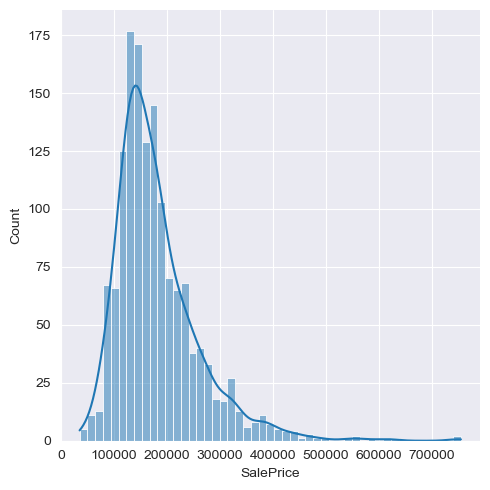

In [13]:
# Analysis  of target variable 'SalePrice'
plt.figure(figsize=[8,10])
sns.set_style('darkgrid')
sns.displot(df['SalePrice'], kde=True)

#### Target variable is right-skewed

In [14]:
# Check skewness of target variable
df['SalePrice'].skew()

1.8828757597682129

In [15]:
# Check the kurtosis of target variable
df['SalePrice'].kurtosis()

6.536281860064529

#### Based on Skewness and Kurtosis values of target variable we find below inferences
- The skewness is greater that 1, so the target variable is highly skewed
- The Kurtosis is greater than 1, distribution of target variable is highly peaked
#### So, we will log transform our target variable

In [16]:
# Log trasform of target variable
df['SalePrice'] = np.log(df['SalePrice'])

In [17]:
# Check skewness of target variable again
df['SalePrice'].skew()

0.12133506220520406

In [18]:
# Check the kurtosis of target variable again
df['SalePrice'].kurtosis()

0.8095319958036296

#### As both Skew and Kurtosis are less than 1 now we will plot the spread of target variable again

<Axes: xlabel='SalePrice', ylabel='Density'>

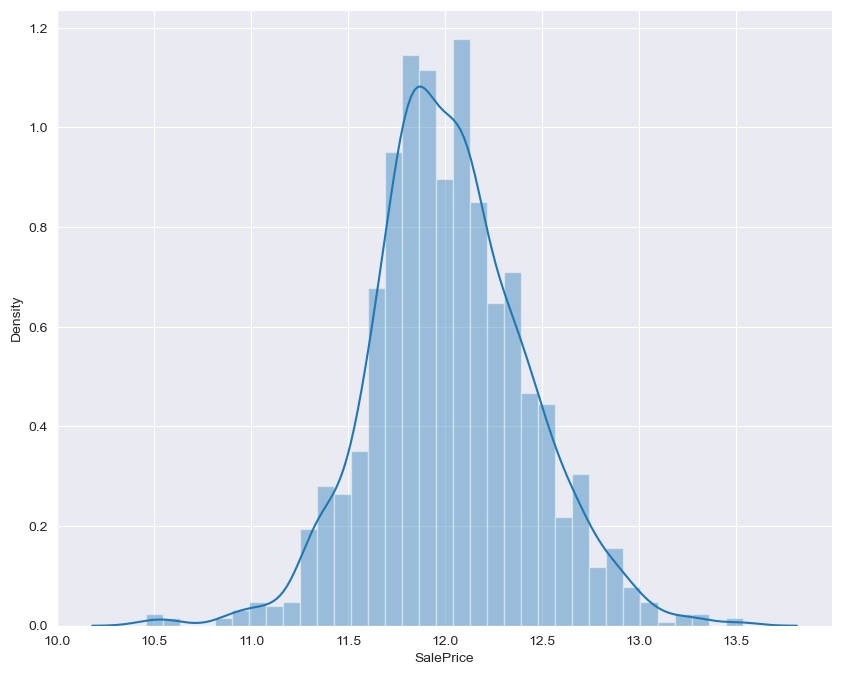

In [19]:
# Plot the spread of target variable 'SalePrice' again
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice'], kde=True)

#### Now the target variable has normal distribution

In [20]:
# Now divide the dataframe into numerical and categorical columns

# Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0   1         65.0     8450       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0           2         548           0           61              0          0            0         0        0       2    2008  12.247694
1   2         80.0     9600       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1           2         460         298            0              0          0            0         0        0       5    2007  12.109011
2   3         68.0    11250       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1           2         608           0           42              0          0            0         0        0       9    2008  12.317167
3   4         60.0     9550       1915          1970         0.0         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1           3         642           0           35            272          0            0         0        0       2    2006  11.849398
4   5         84.0    14260       2000          2000       350.0         655           0        490         1145      1145      1053             0       2198             1             0         2         1             4             1             9           1           3         836         192           84              0          0            0         0        0      12    2008  12.429216

In [21]:
# Extract categorical columns
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageYrBlt GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ        None     Attchd        2003          RFn         TA         TA          Y   None  None        None       WD        Normal
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story           6           8     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd        1976          RFn         TA         TA          Y   None  None        None       WD        Normal
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd        2001          RFn         TA         TA          Y   None  None        None       WD        Normal
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story           7           5     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr          Gd        Typ          Gd     Detchd        1998          Unf         TA         TA          Y   None  None        None       WD       Abnorml
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story           8           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd        2000          RFn         TA         TA          Y   None  None        None       WD        Normal

### EDA on Numerical Columns

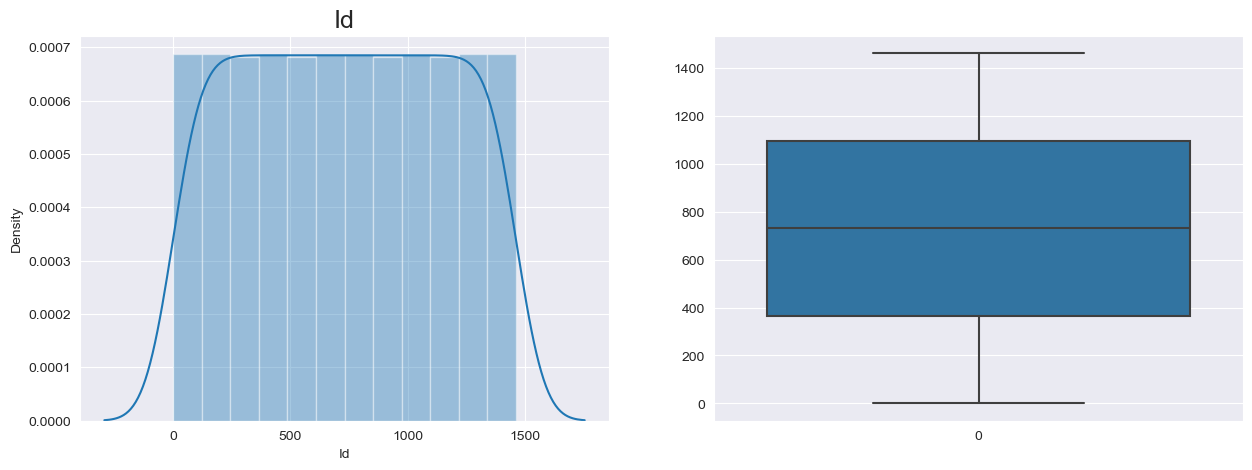

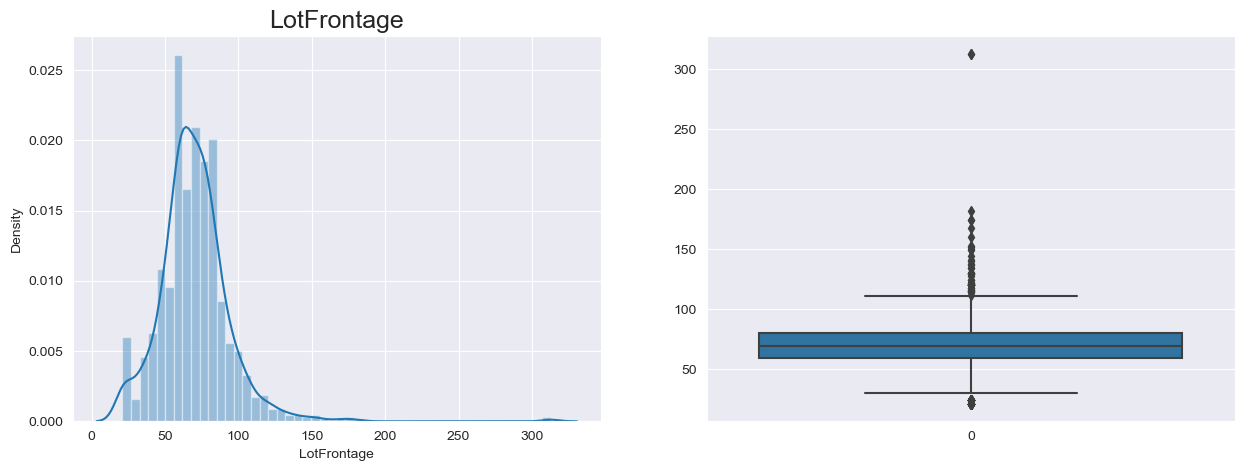

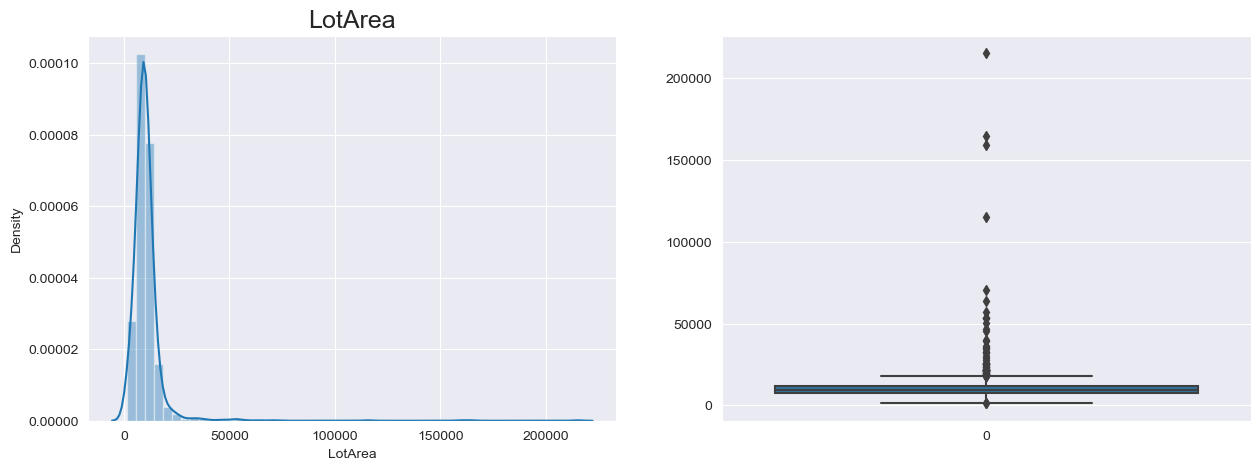

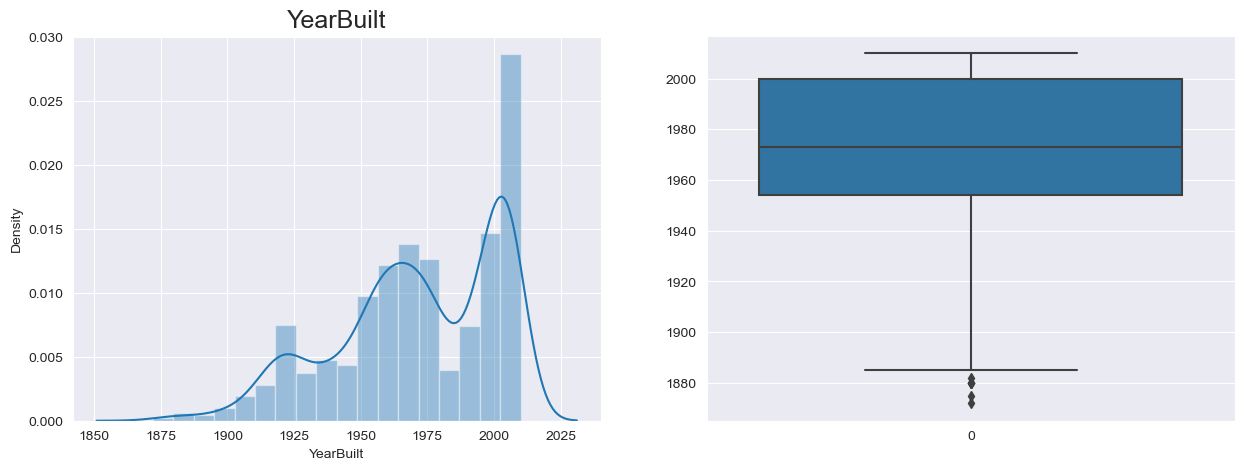

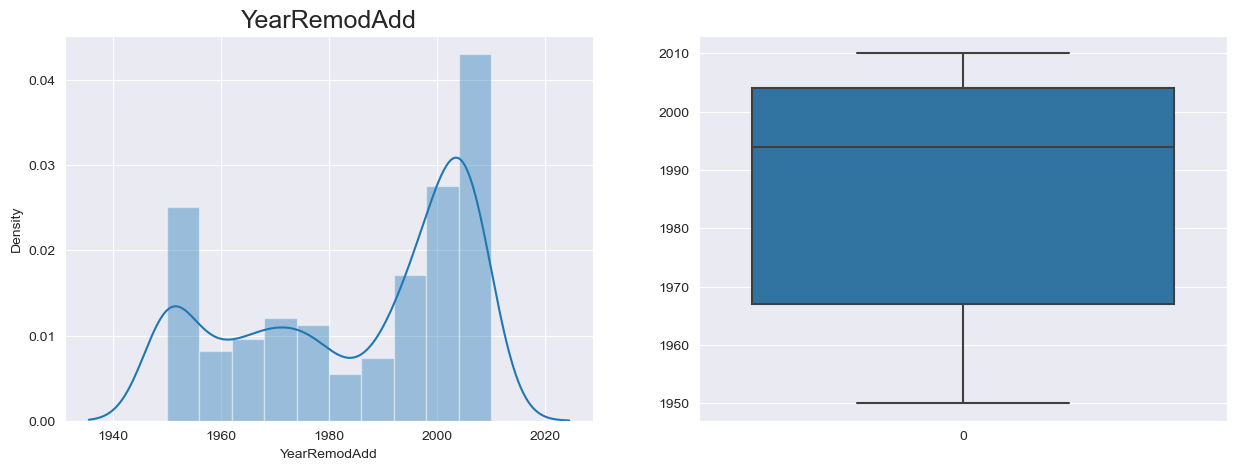

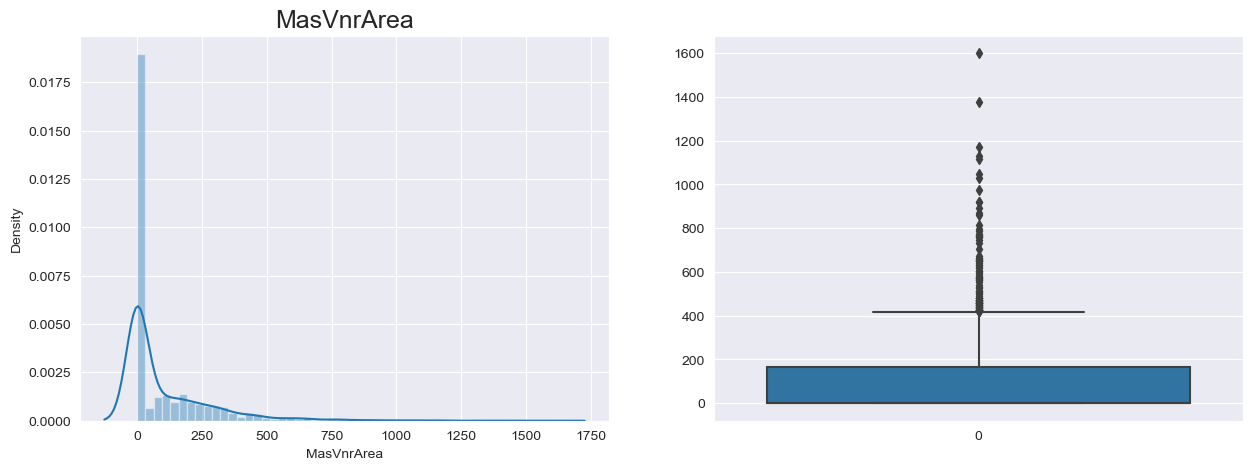

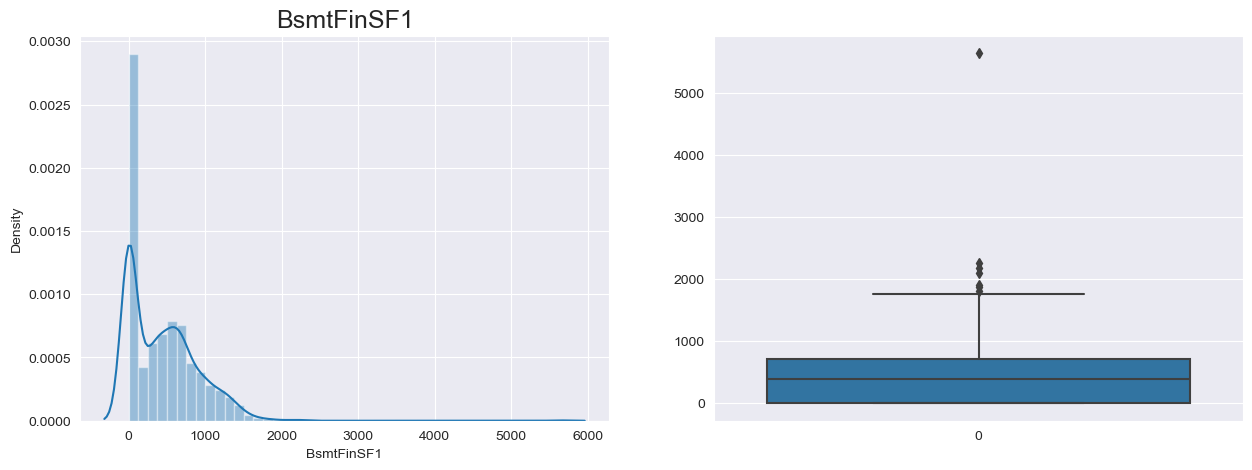

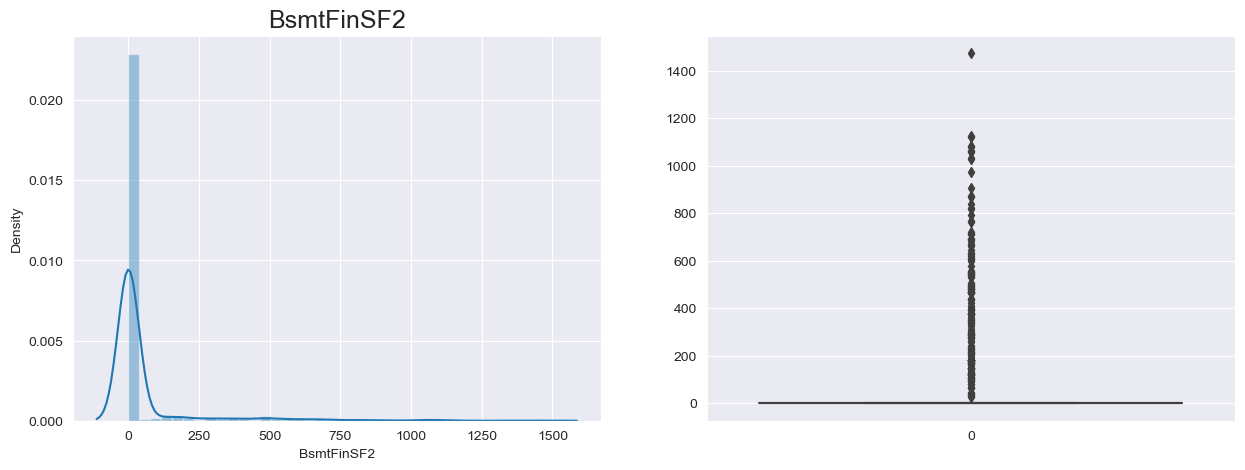

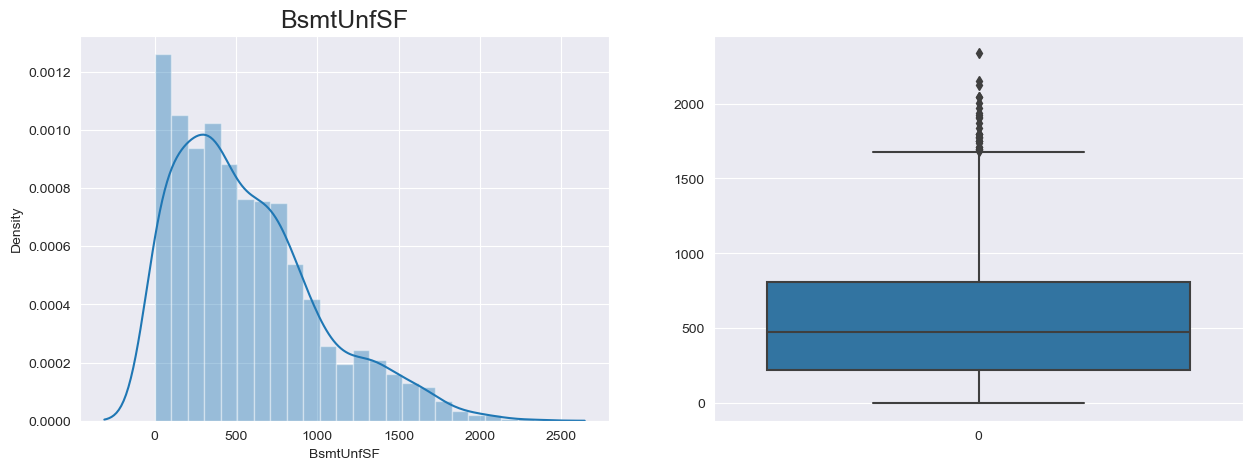

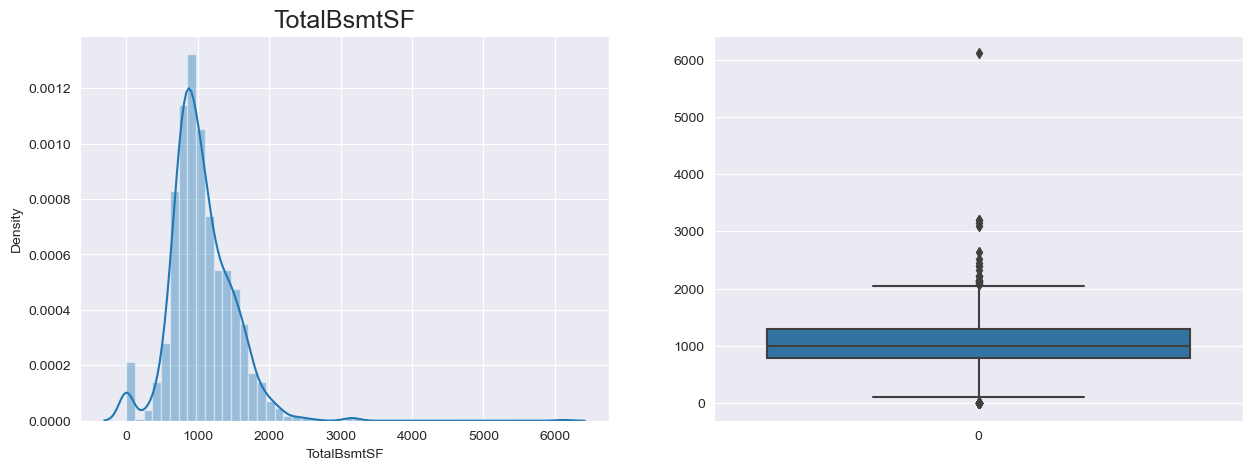

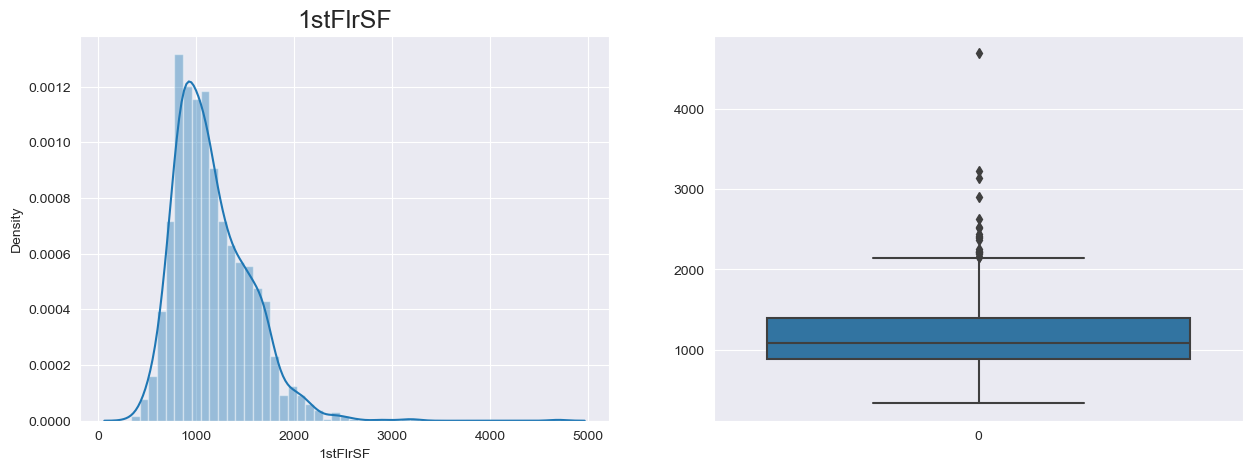

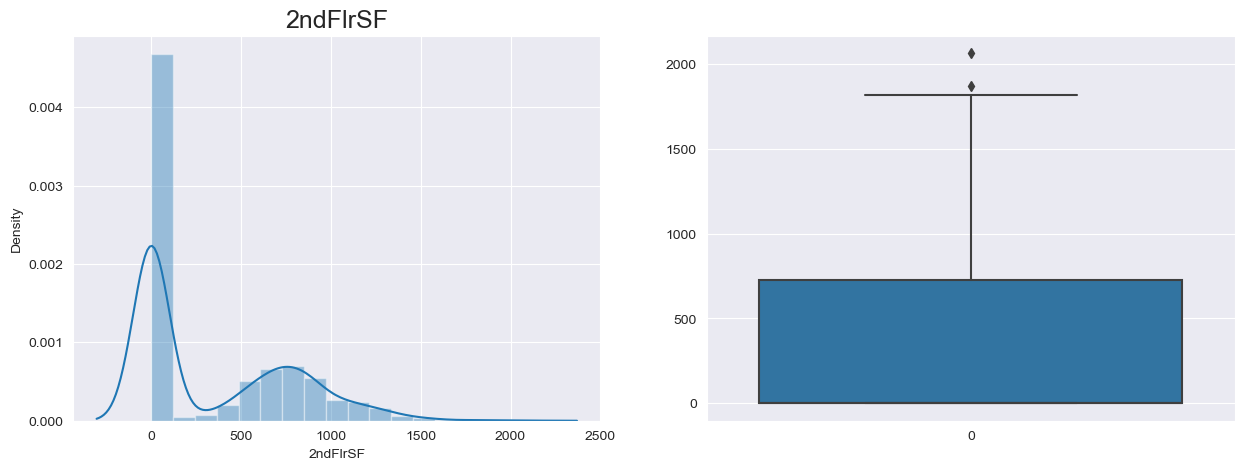

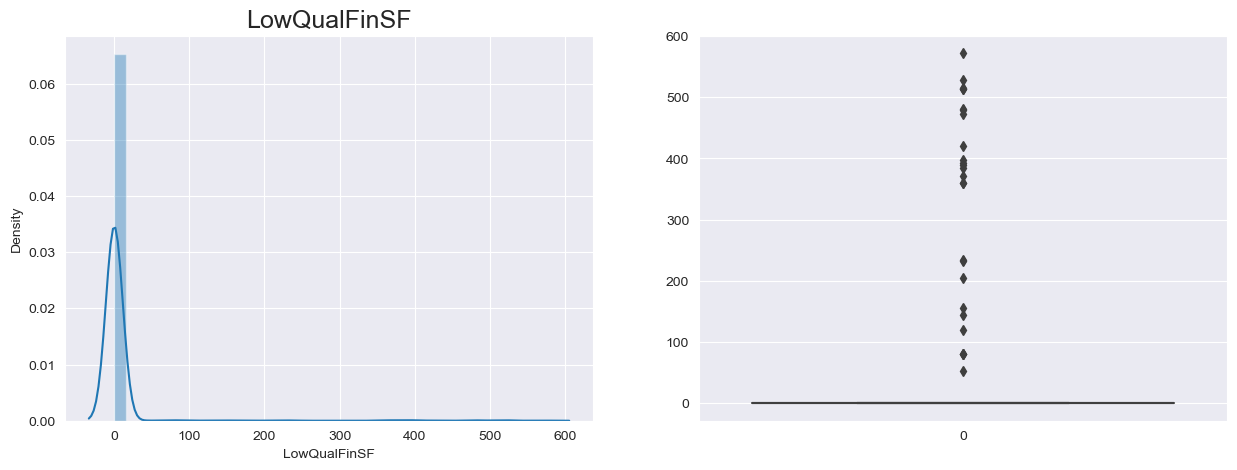

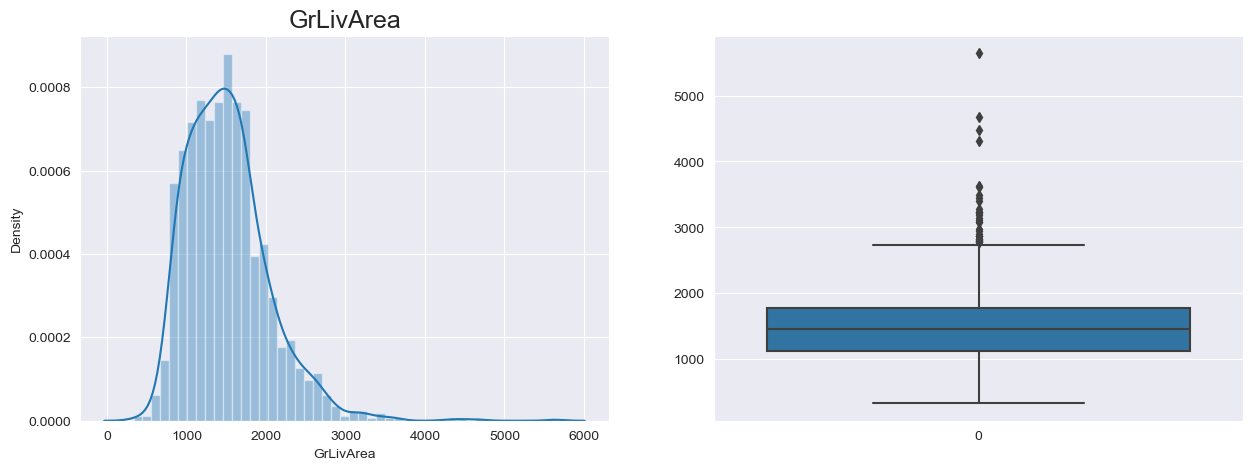

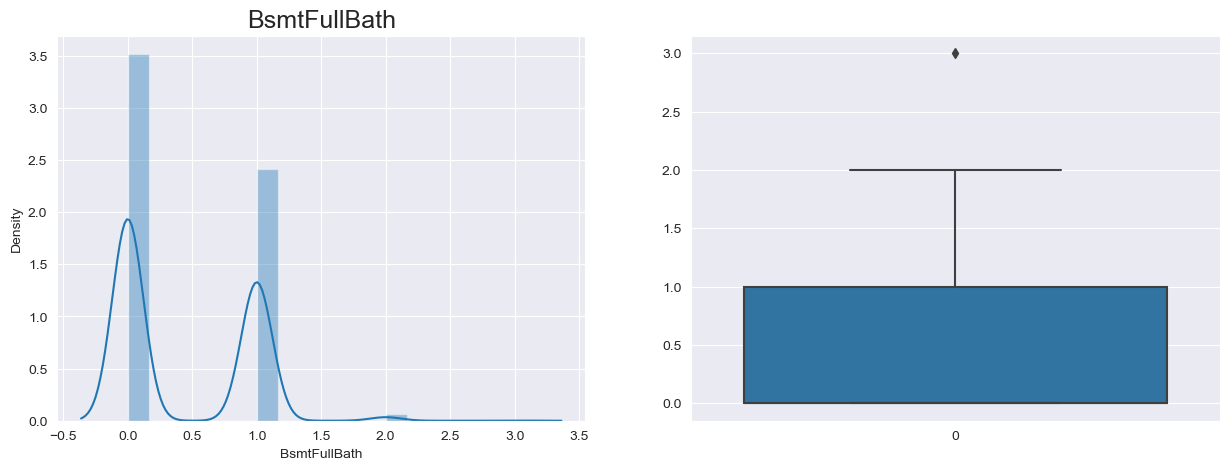

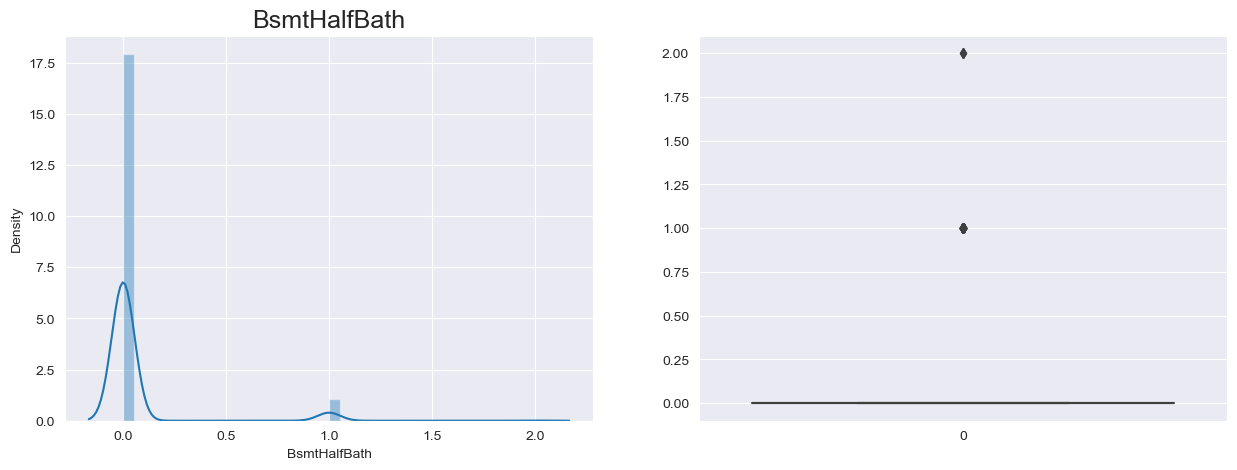

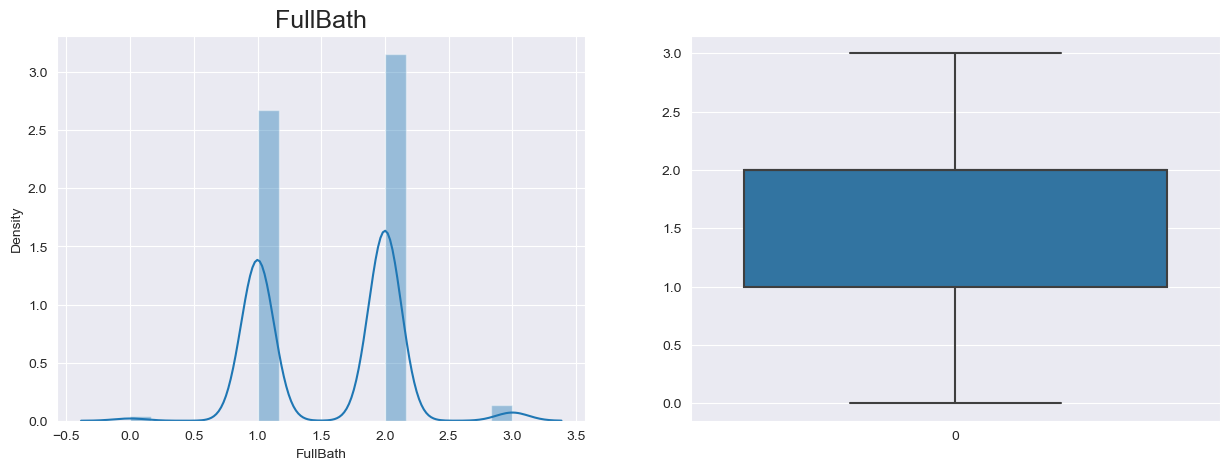

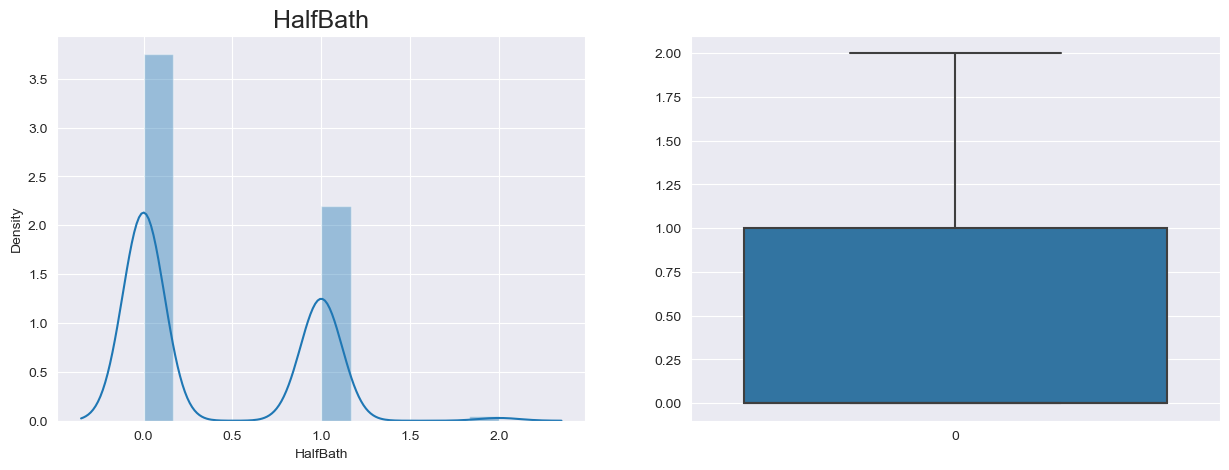

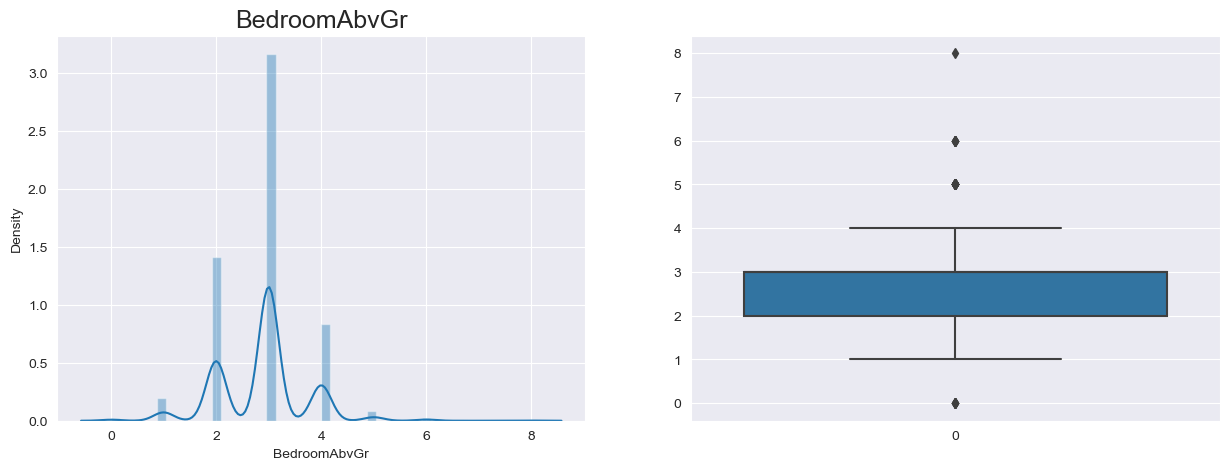

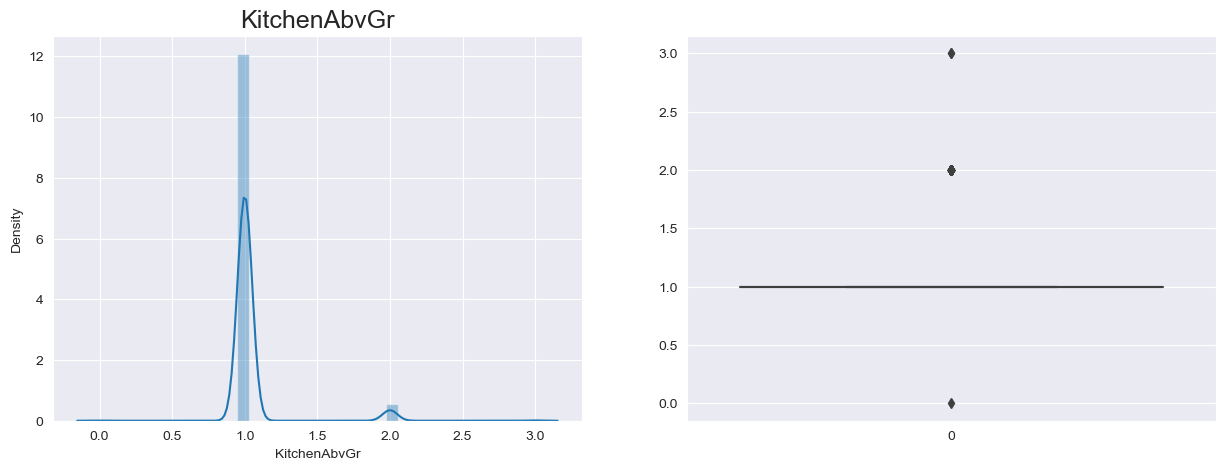

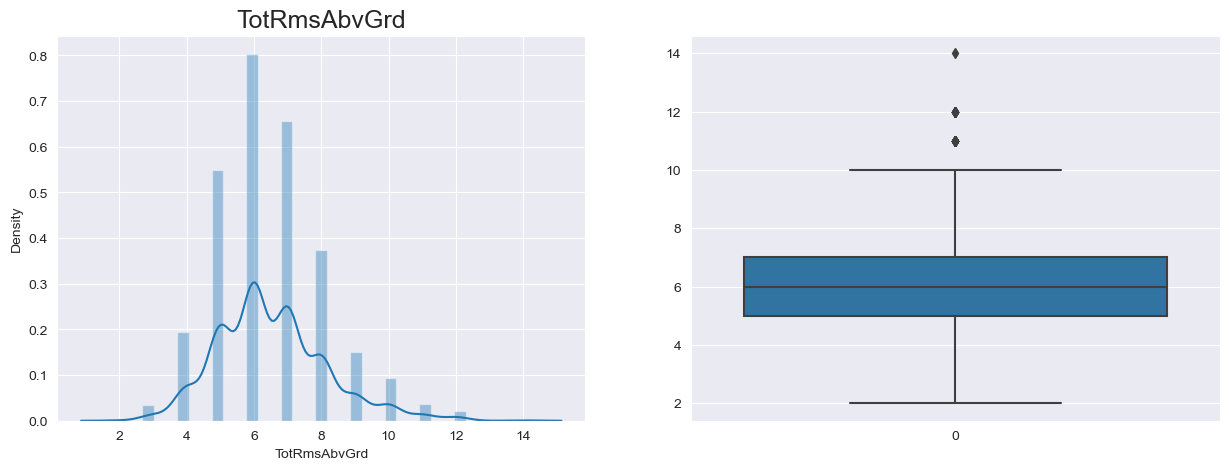

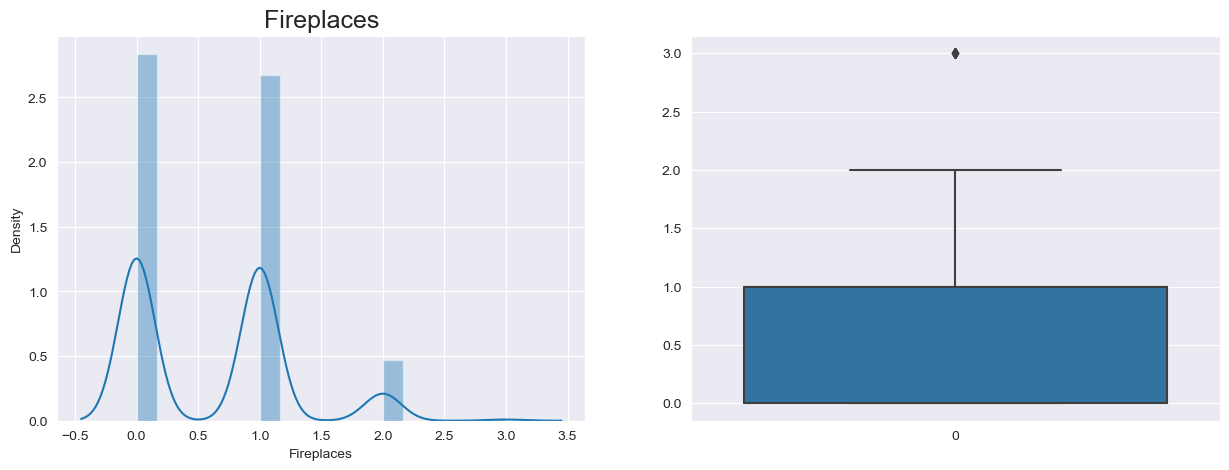

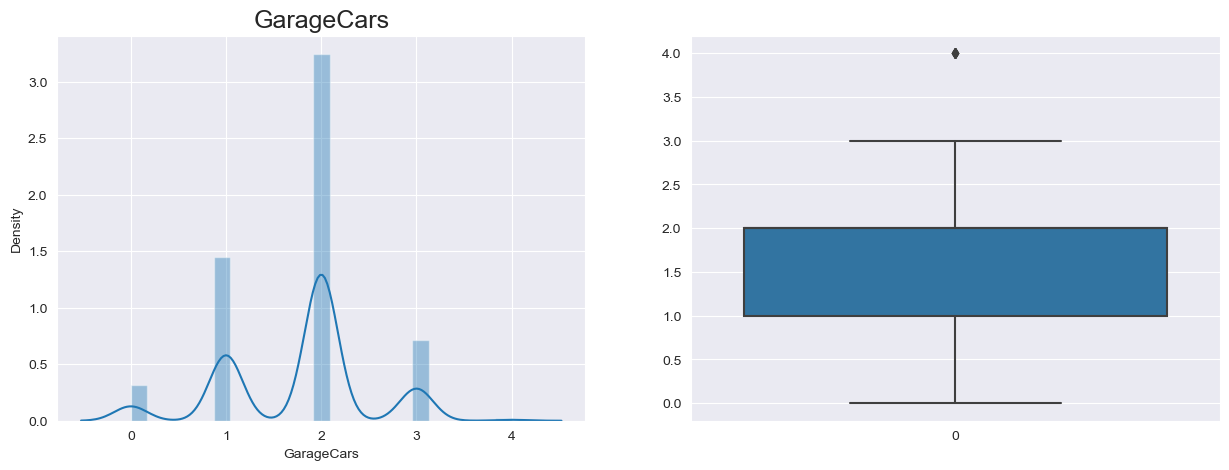

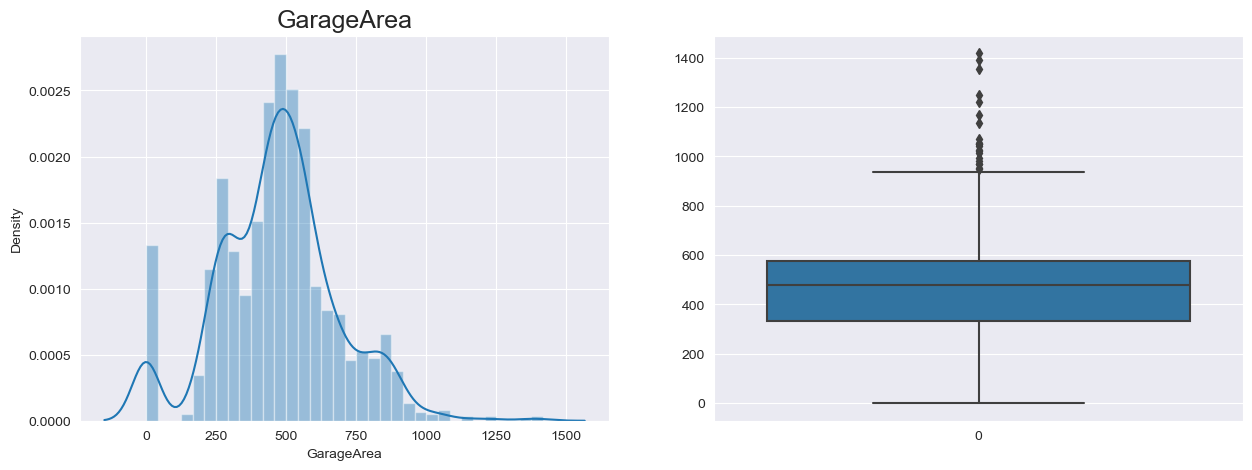

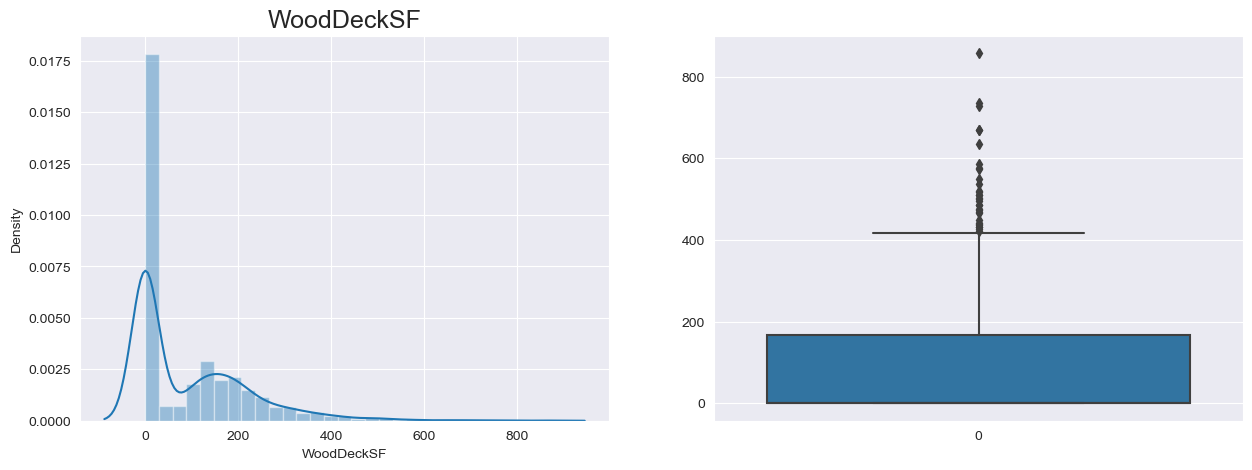

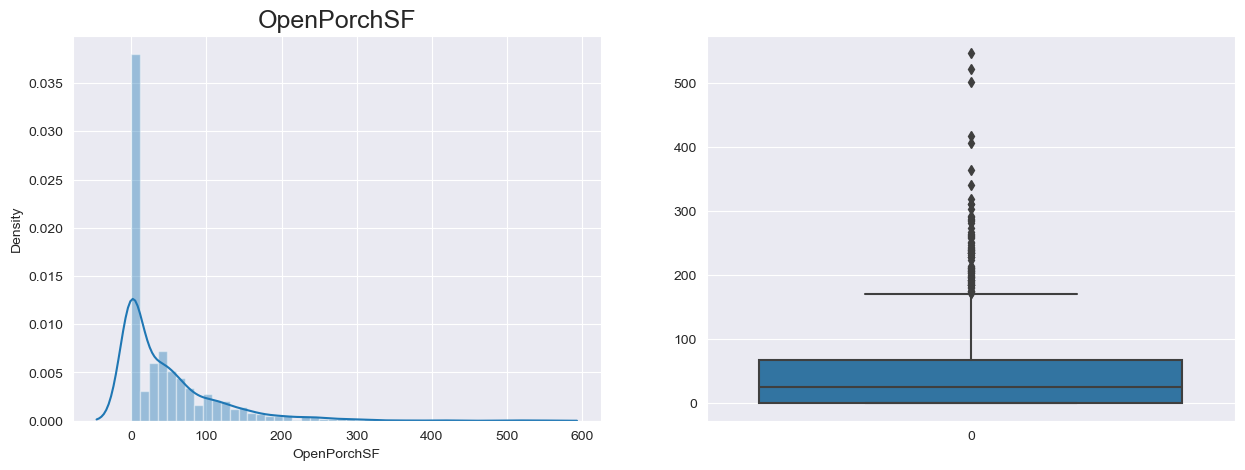

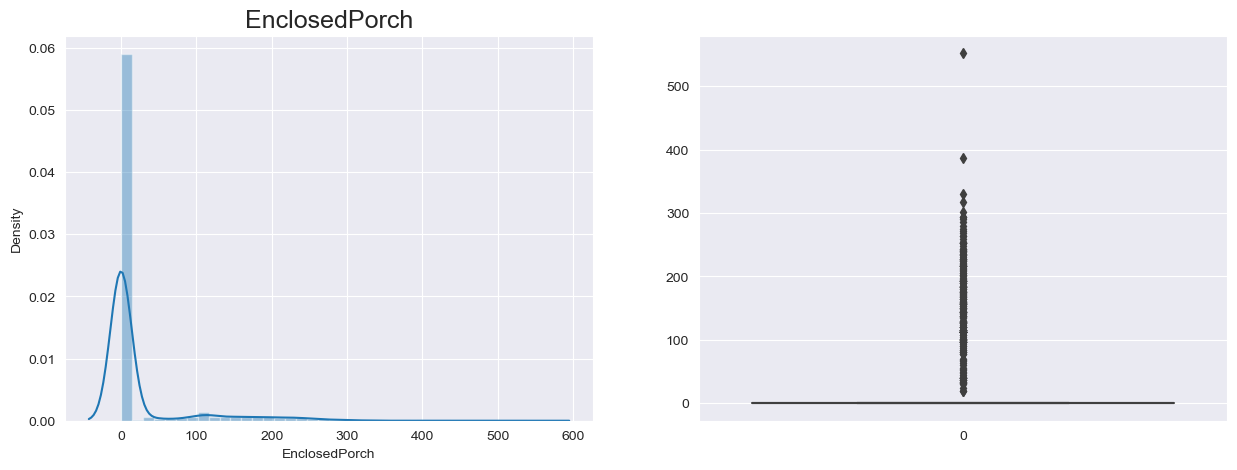

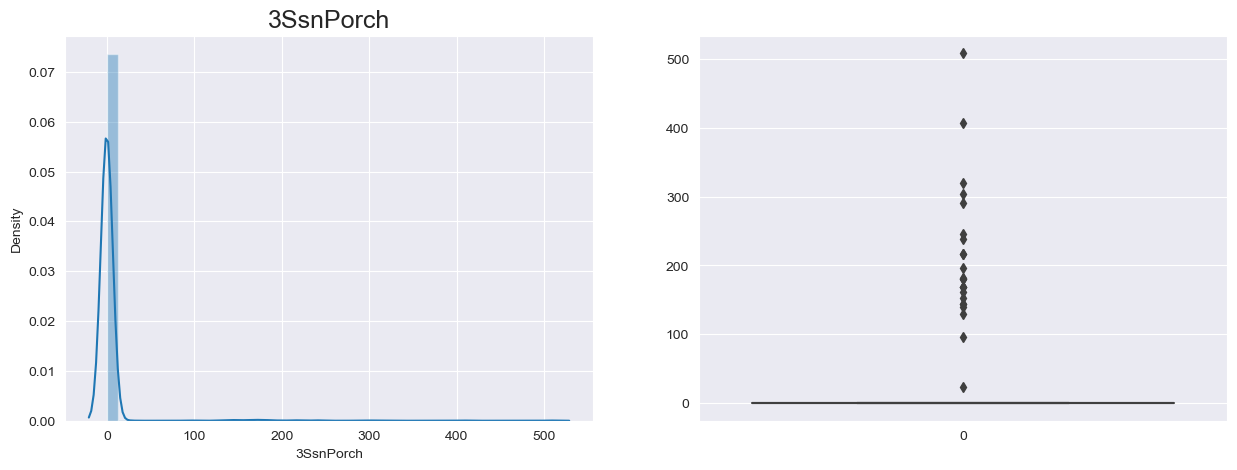

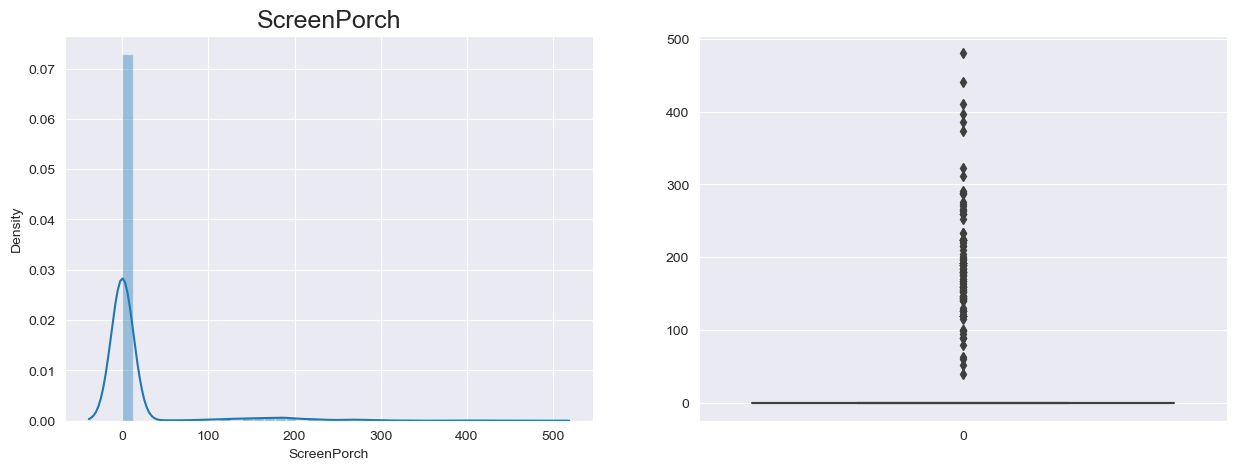

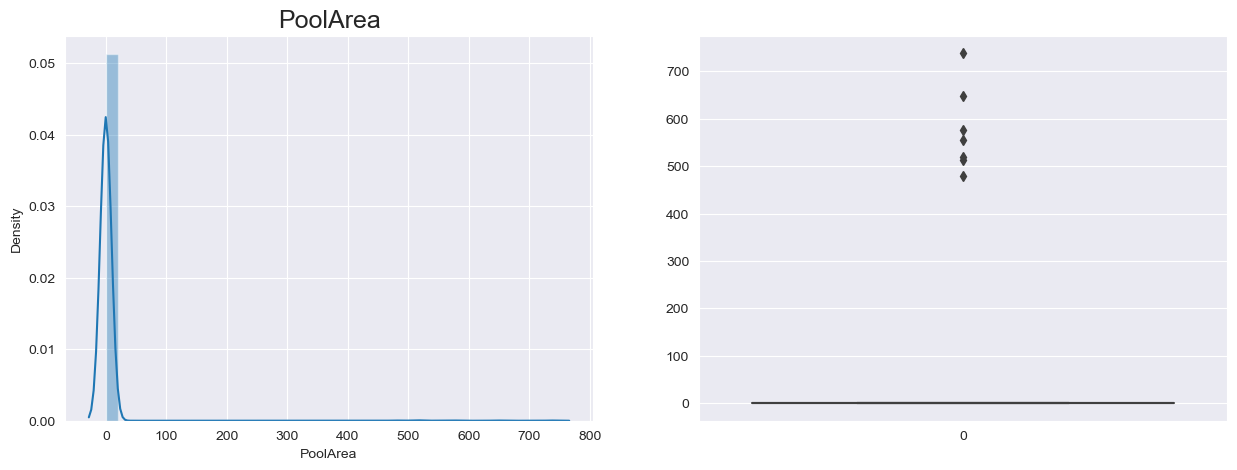

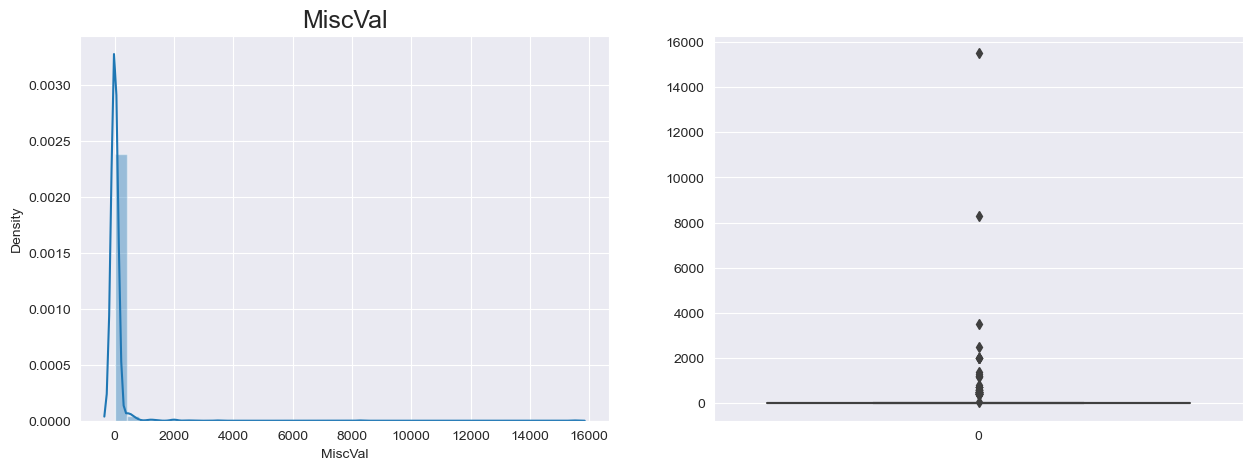

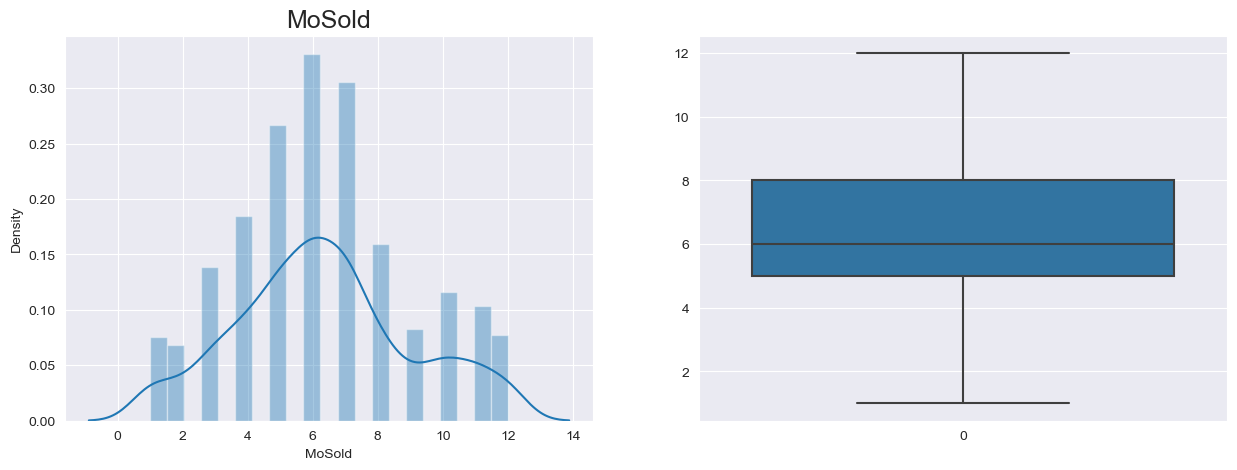

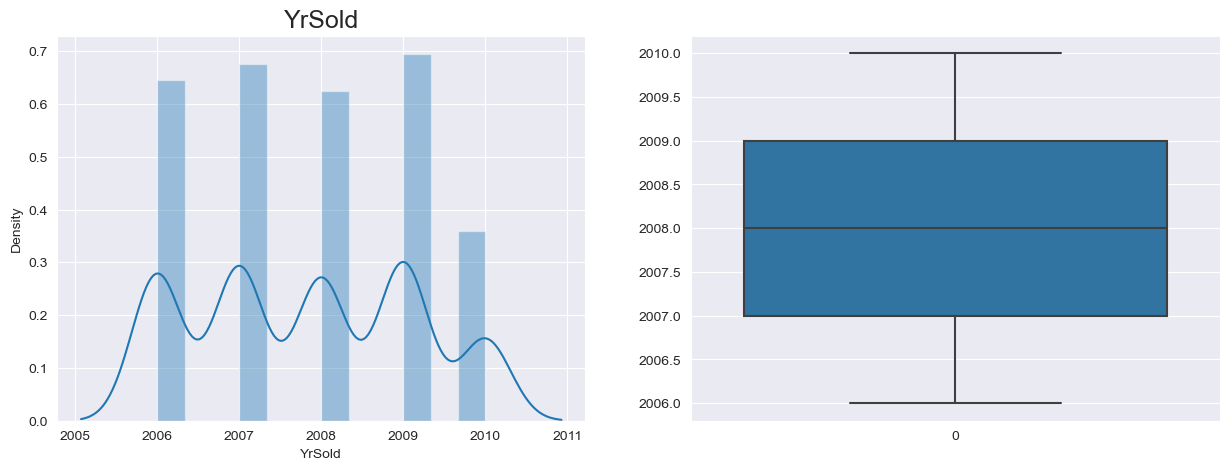

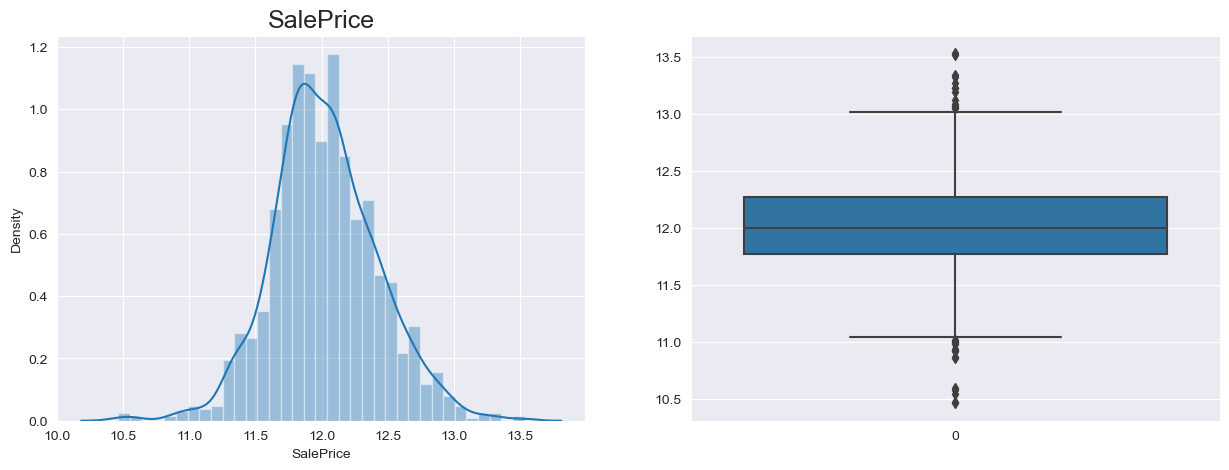

In [22]:
# View the distribution of all numerical variables using histogram and boxplot

for col in df_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()

#### Most of the numerical columns do not have normal distribution
#### Most of the columns have outliers, so outlier treatment will be required

### EDA on Categorical Columns

In [23]:
# View unique values of all Categorical columns
for col in df_cat.columns:
    print("Column Name: ", col)
    print(df[col].unique(), '\n')

Column Name:  MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

Column Name:  MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Column Name:  Street
['Pave' 'Grvl'] 

Column Name:  Alley
['None' 'Grvl' 'Pave'] 

Column Name:  LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

Column Name:  LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Column Name:  Utilities
['AllPub' 'NoSeWa'] 

Column Name:  LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

Column Name:  LandSlope
['Gtl' 'Mod' 'Sev'] 

Column Name:  Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Column Name:  Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Column Name:  Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

Column Name:  BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 

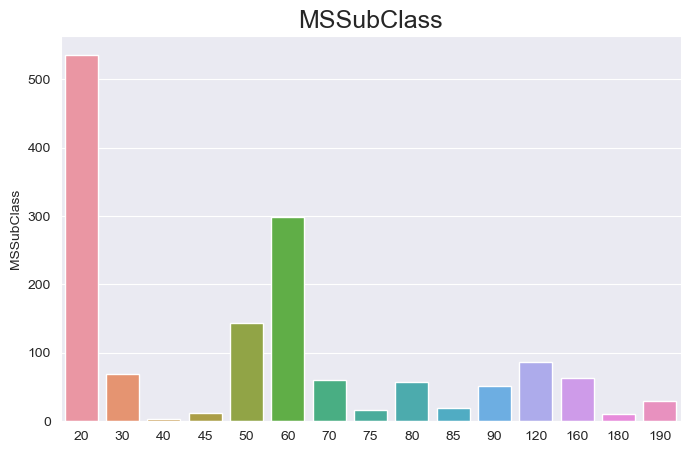

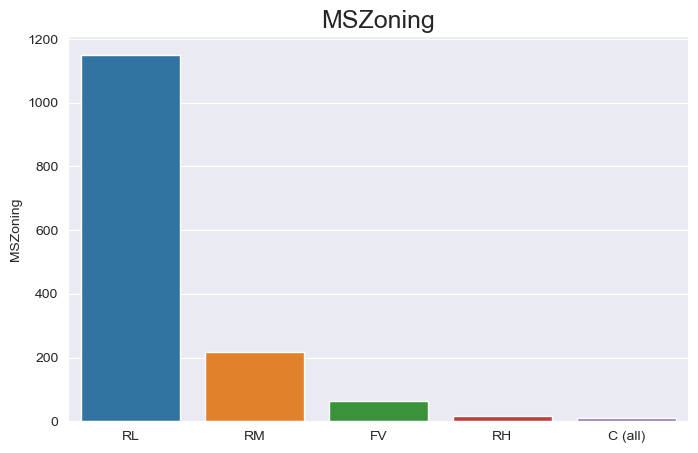

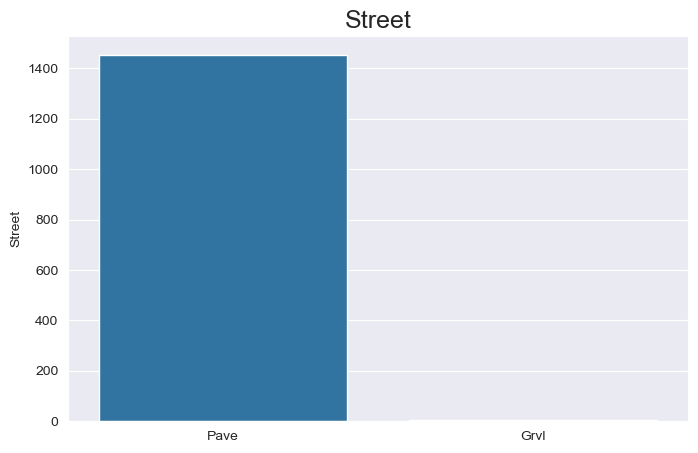

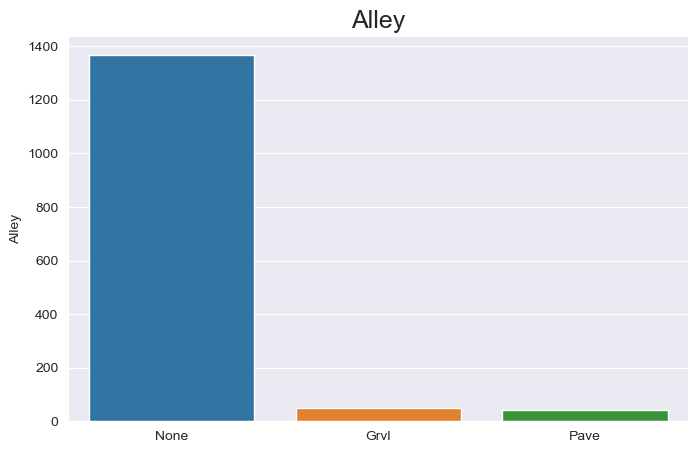

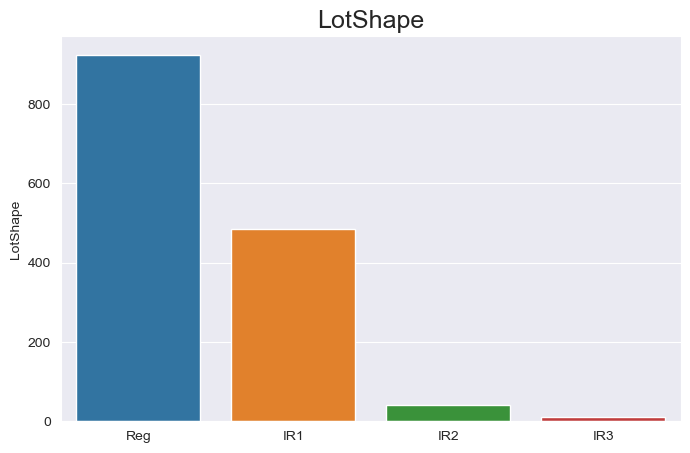

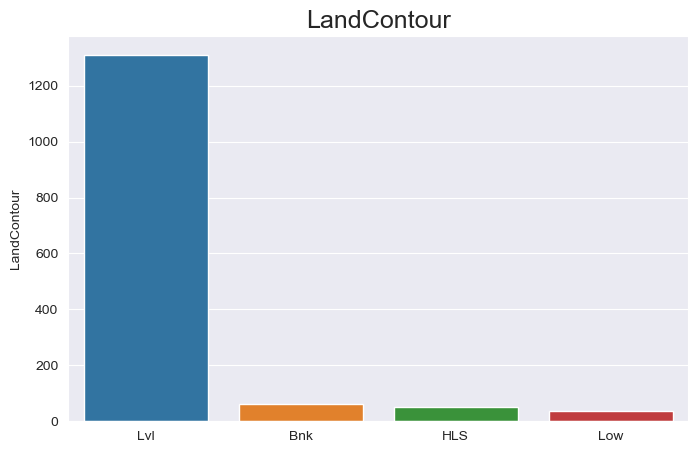

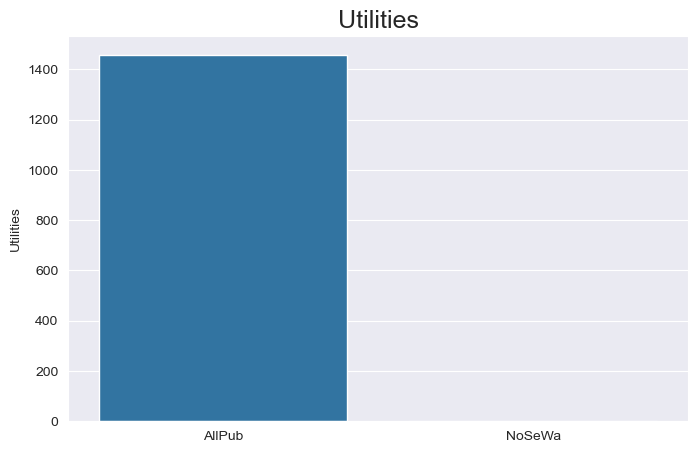

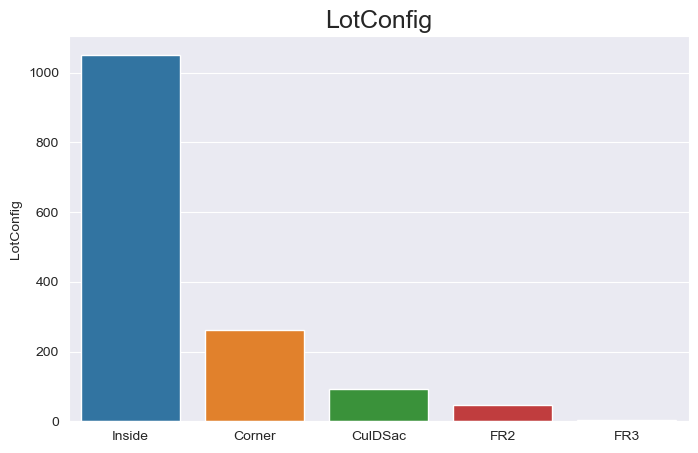

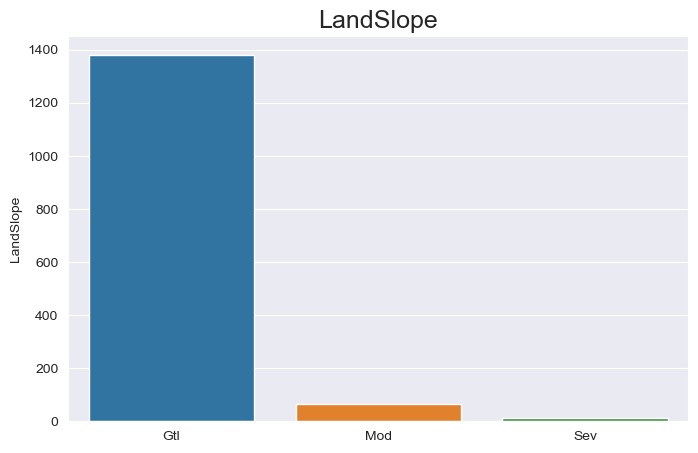

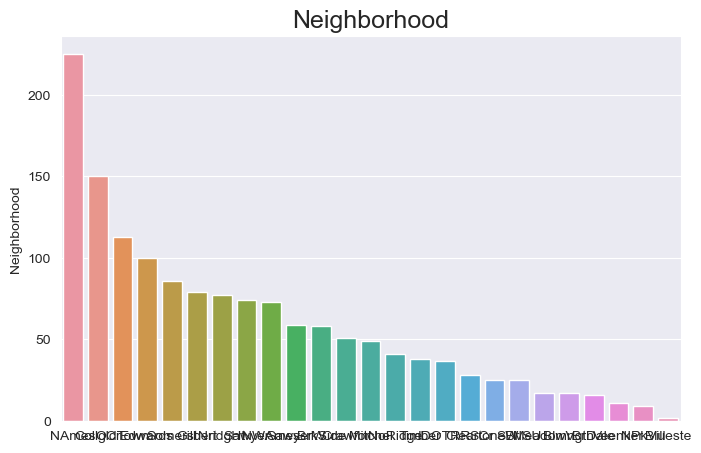

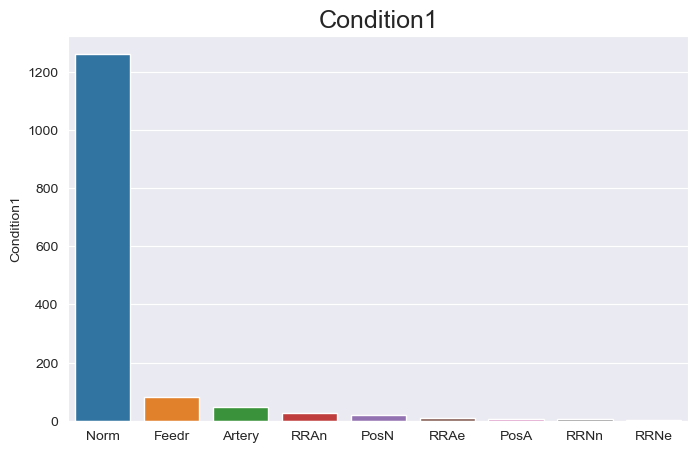

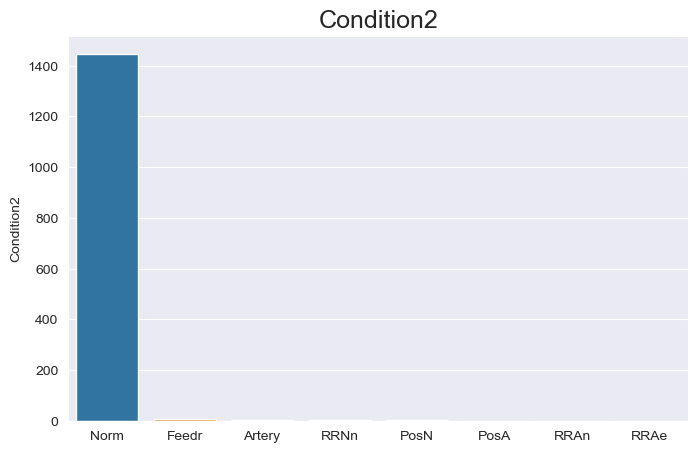

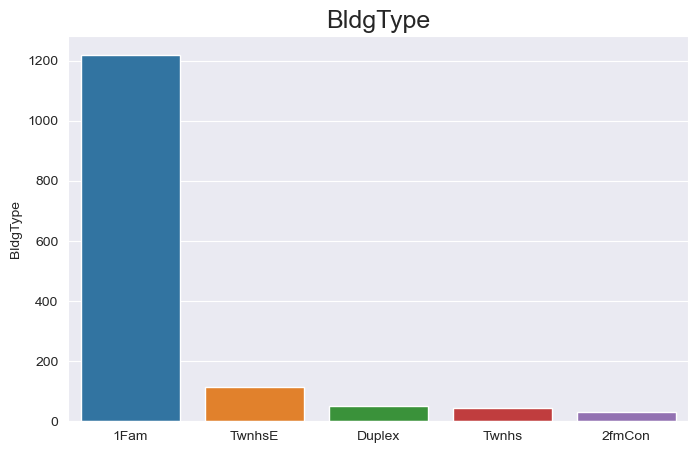

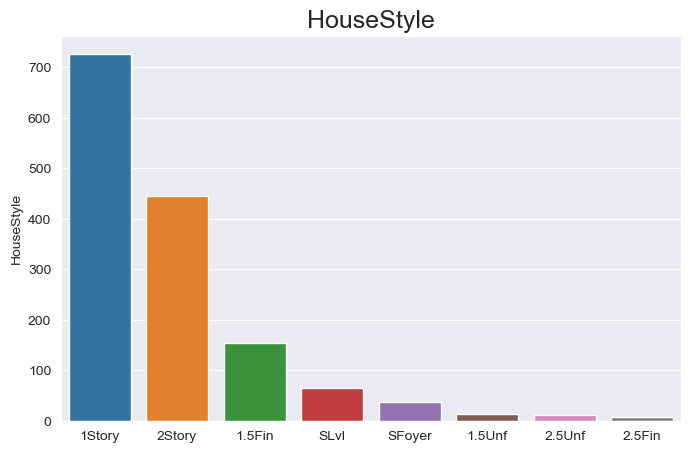

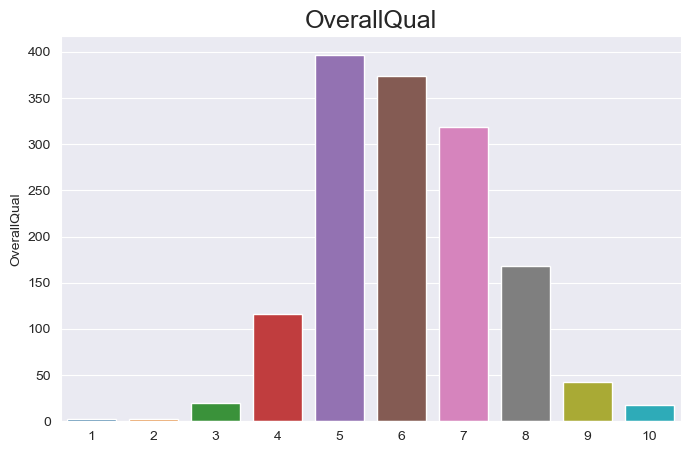

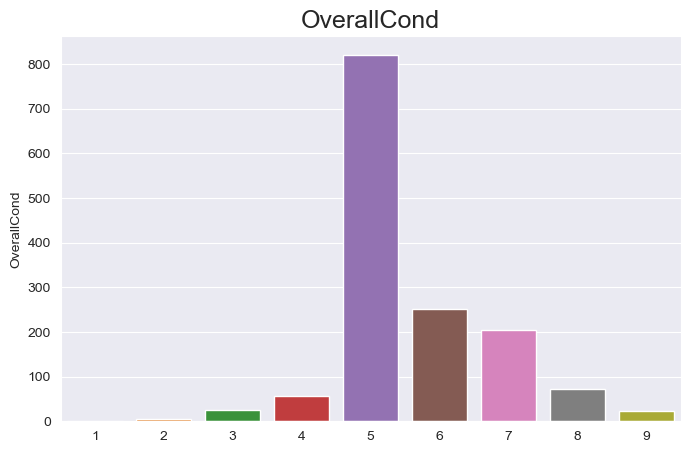

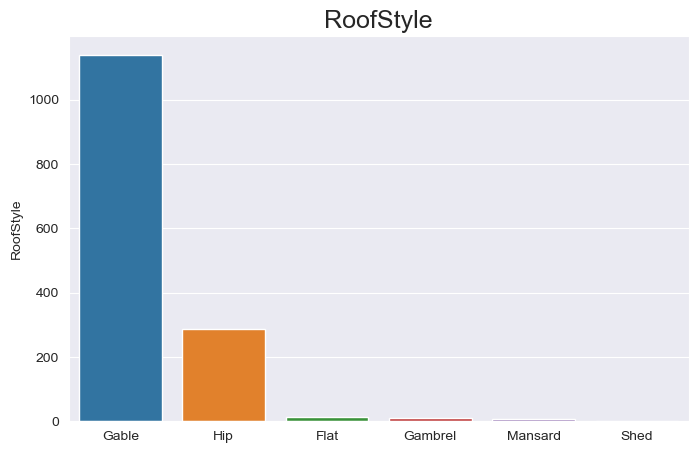

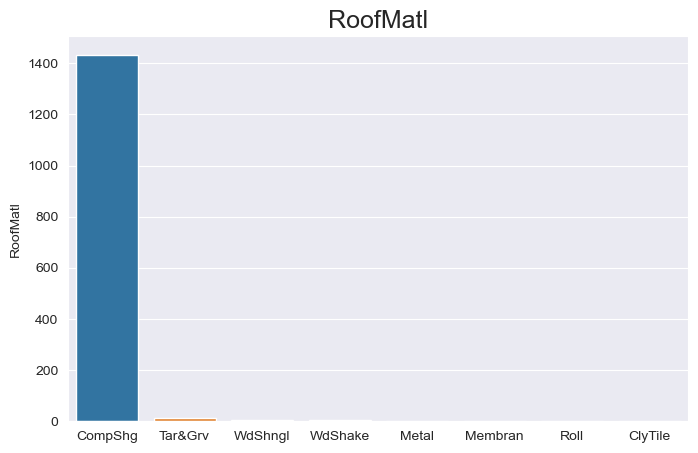

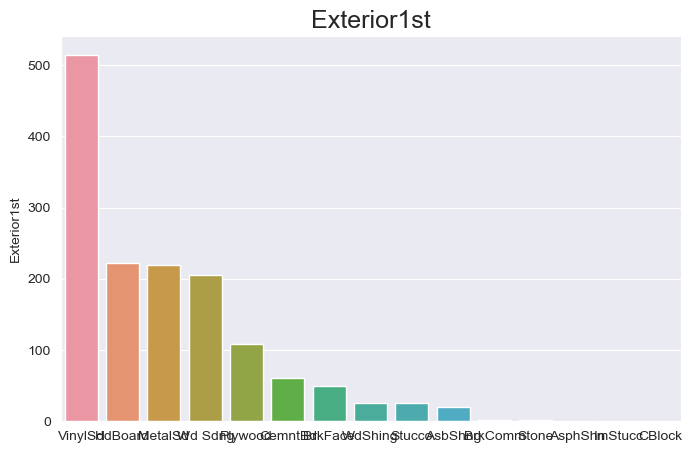

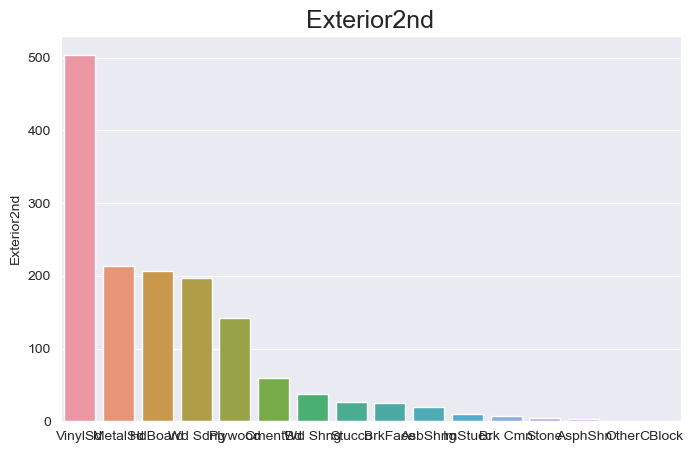

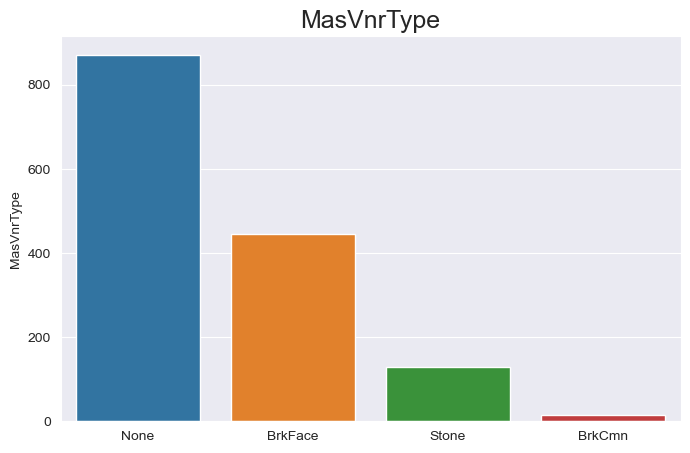

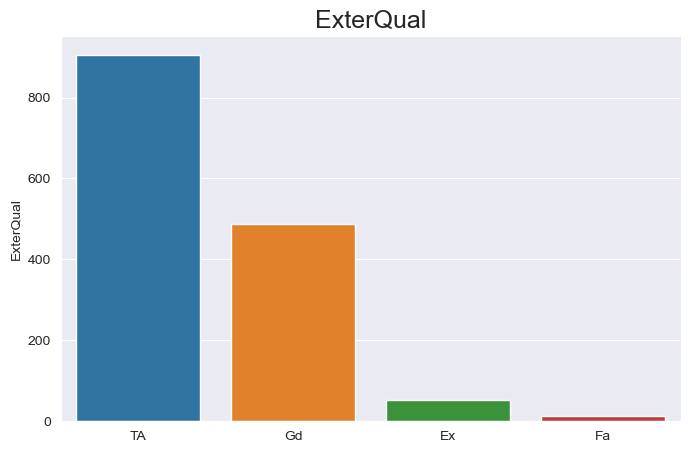

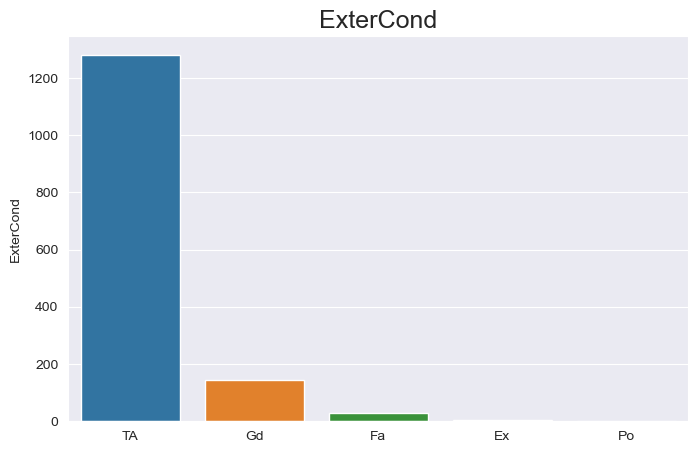

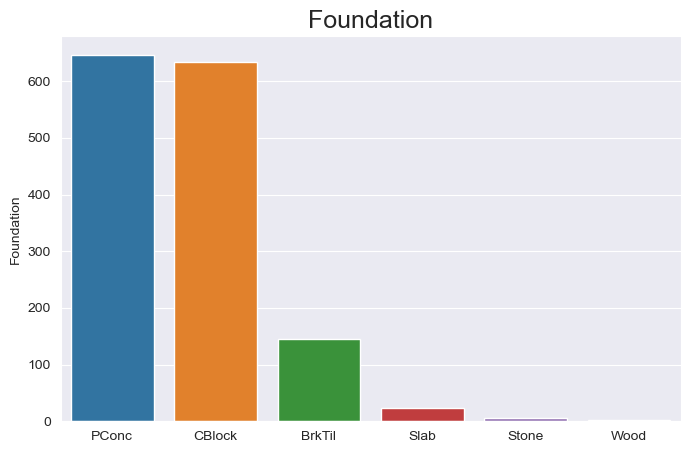

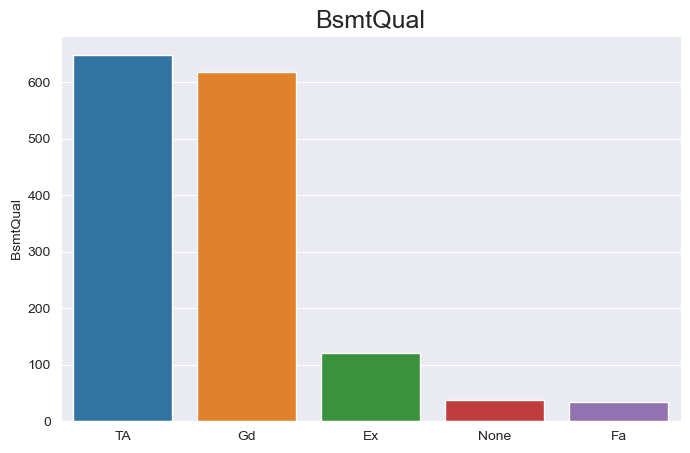

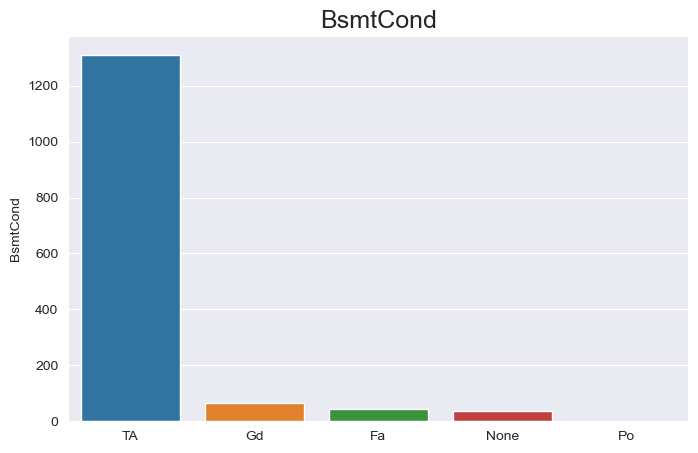

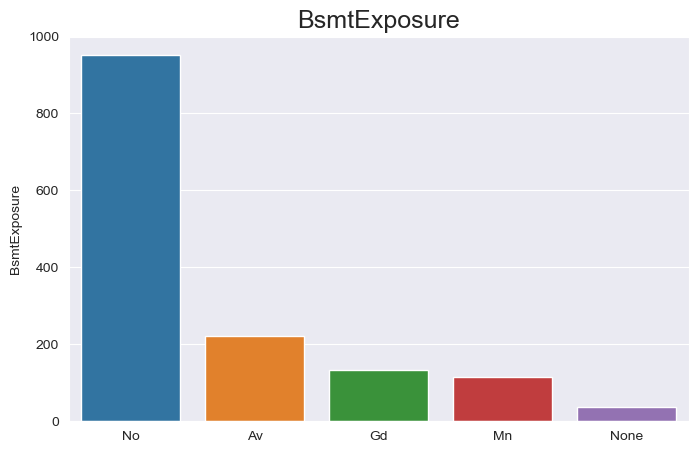

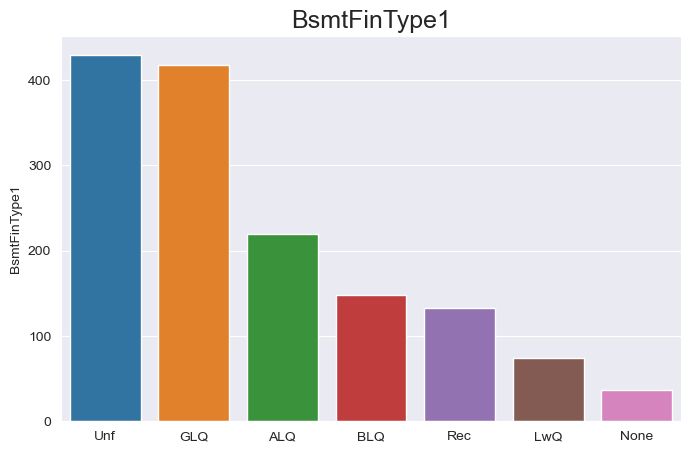

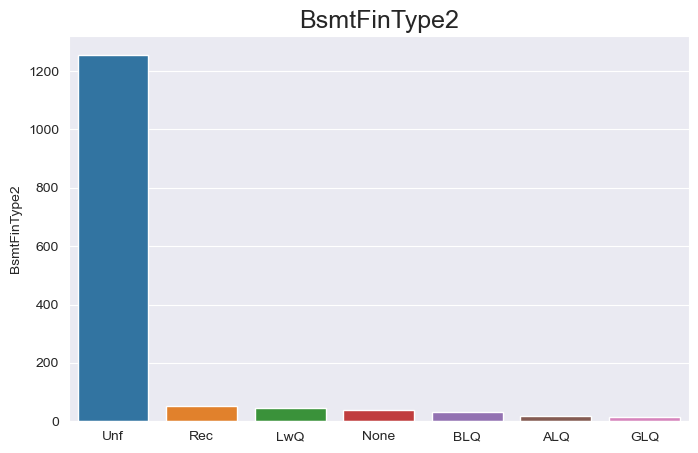

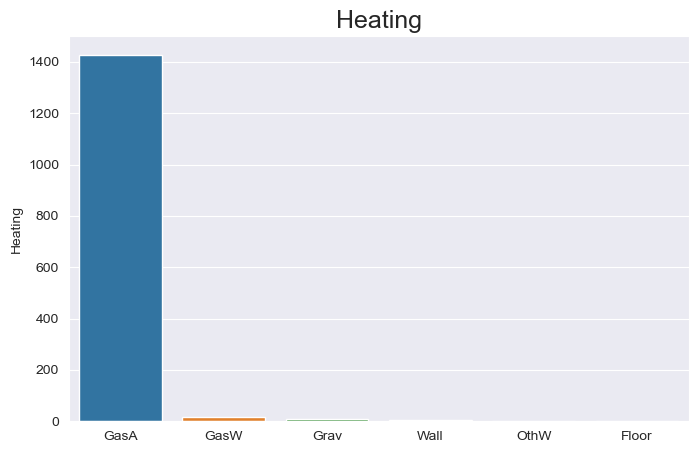

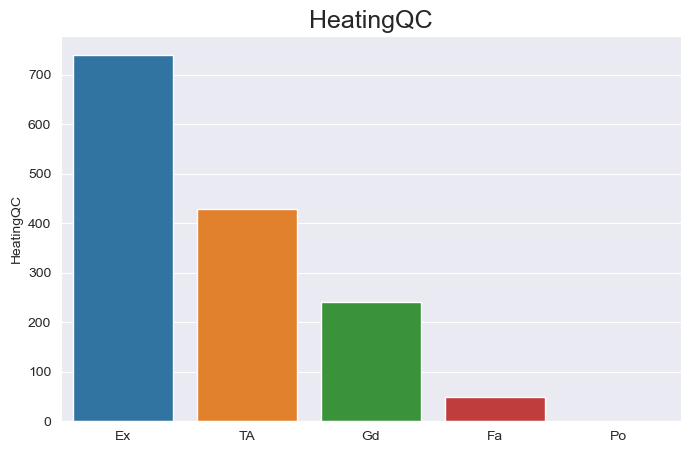

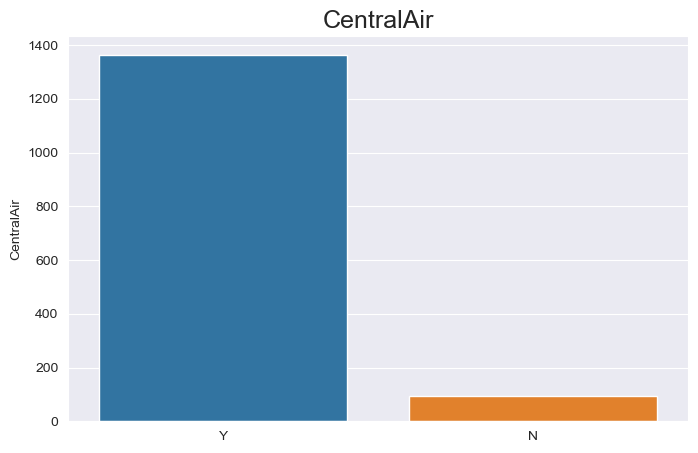

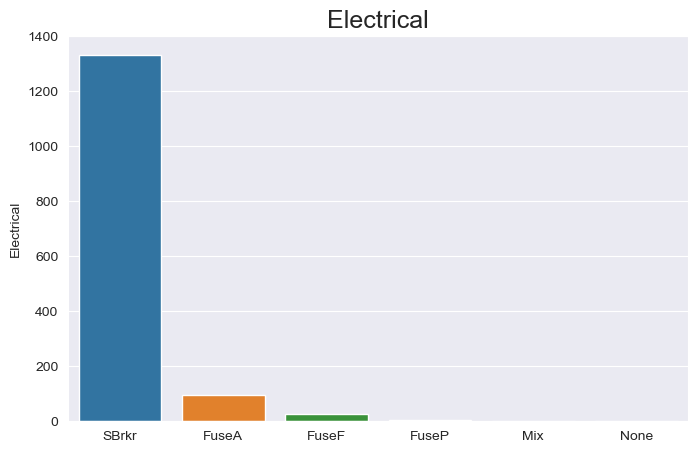

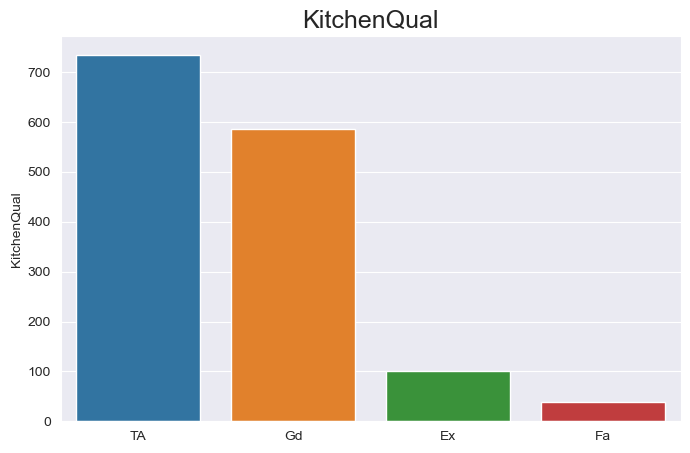

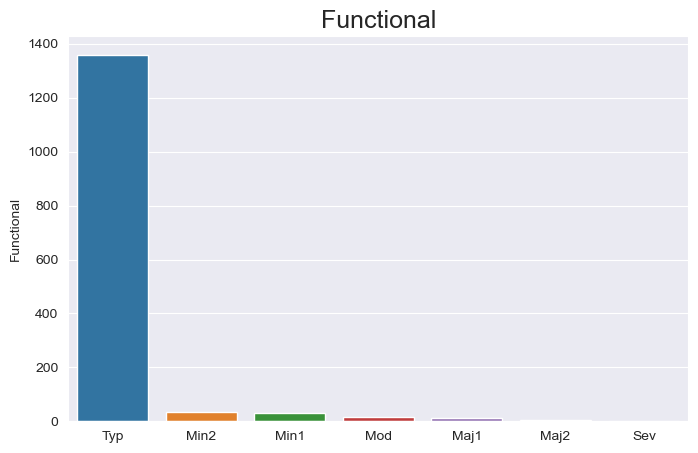

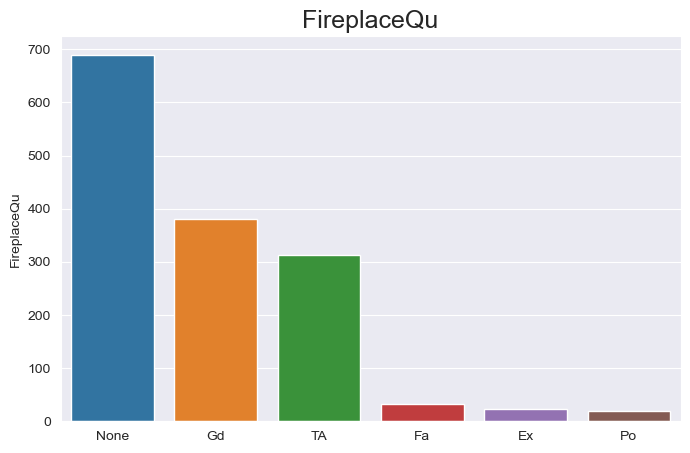

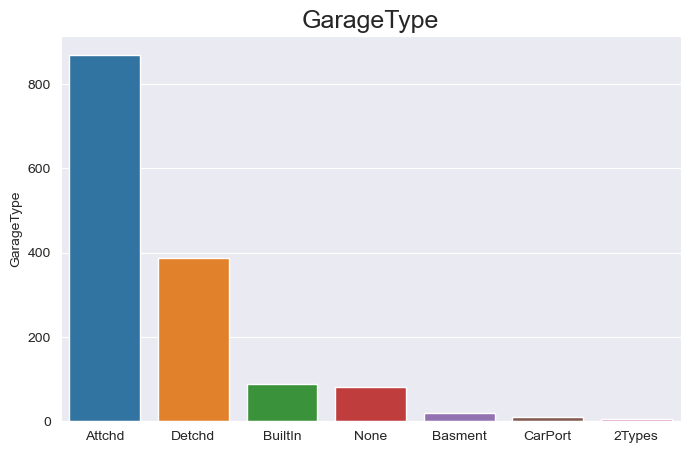

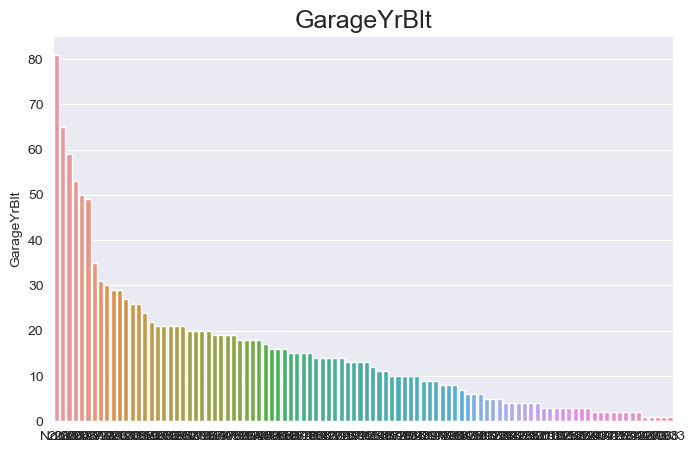

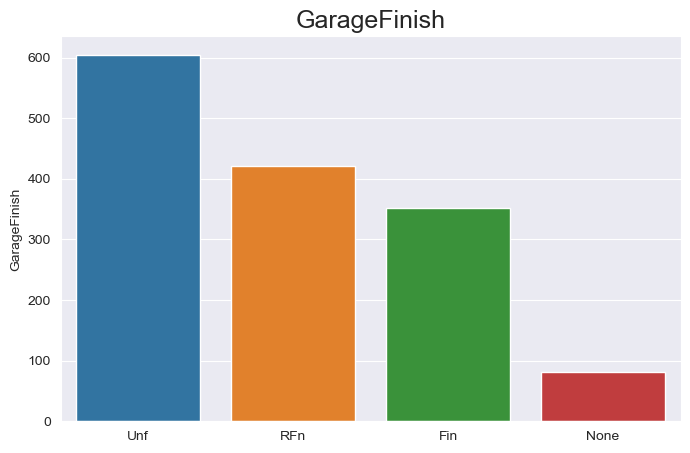

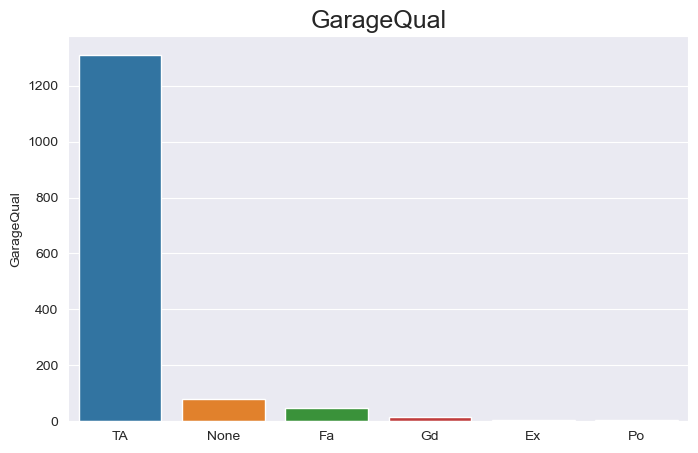

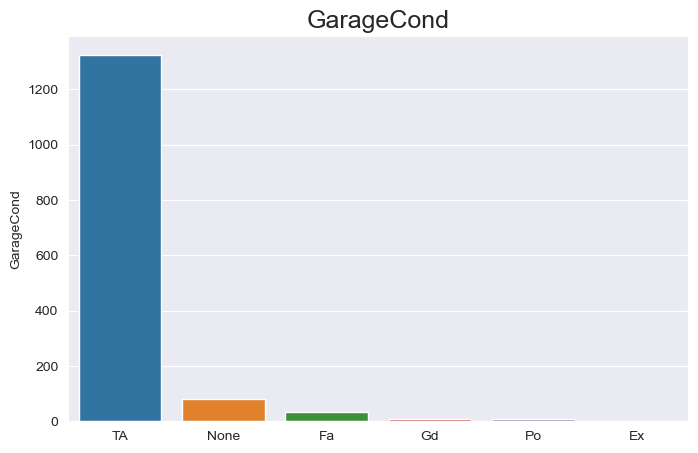

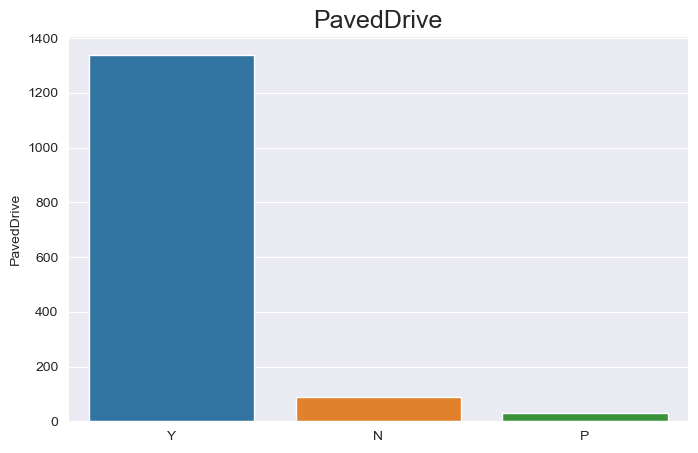

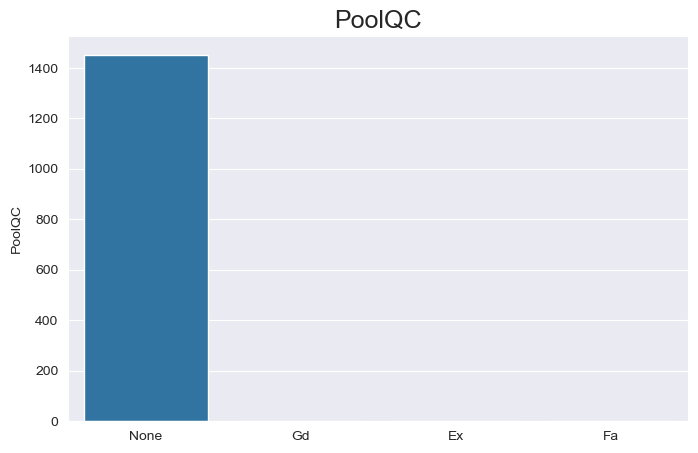

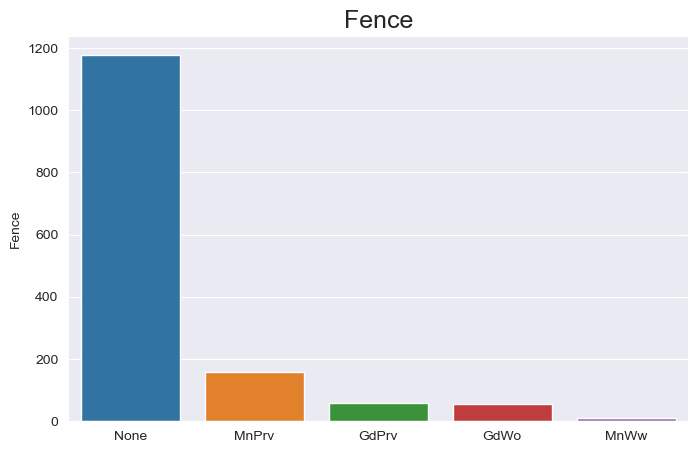

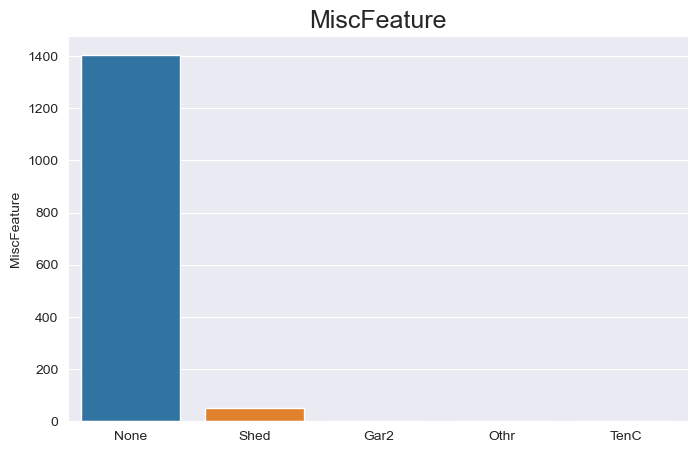

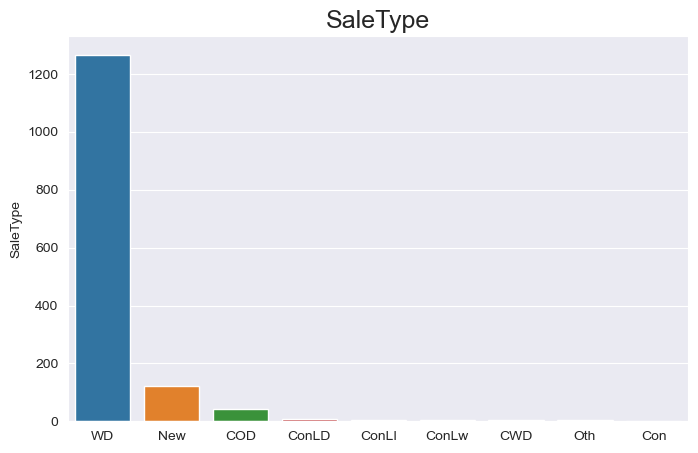

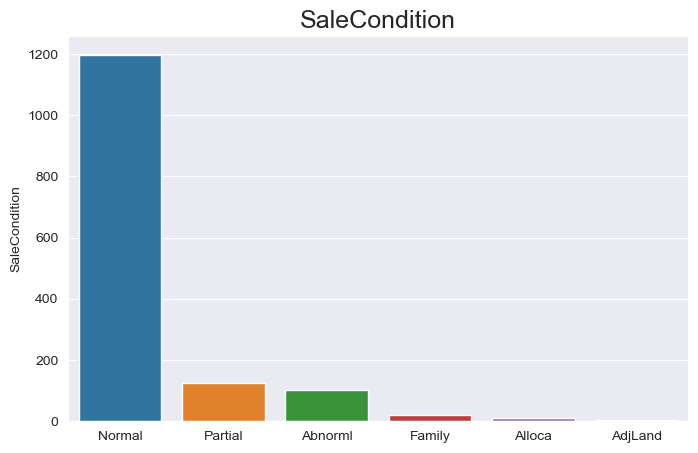

In [24]:
# Visualizing the categorical columns using bar plots
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts())
    plt.show()

#### Based on the barplot it is clearly visible that there are no categorical columns with single unique value so that in can be removed

### Bivariate Analysis

<Axes: >

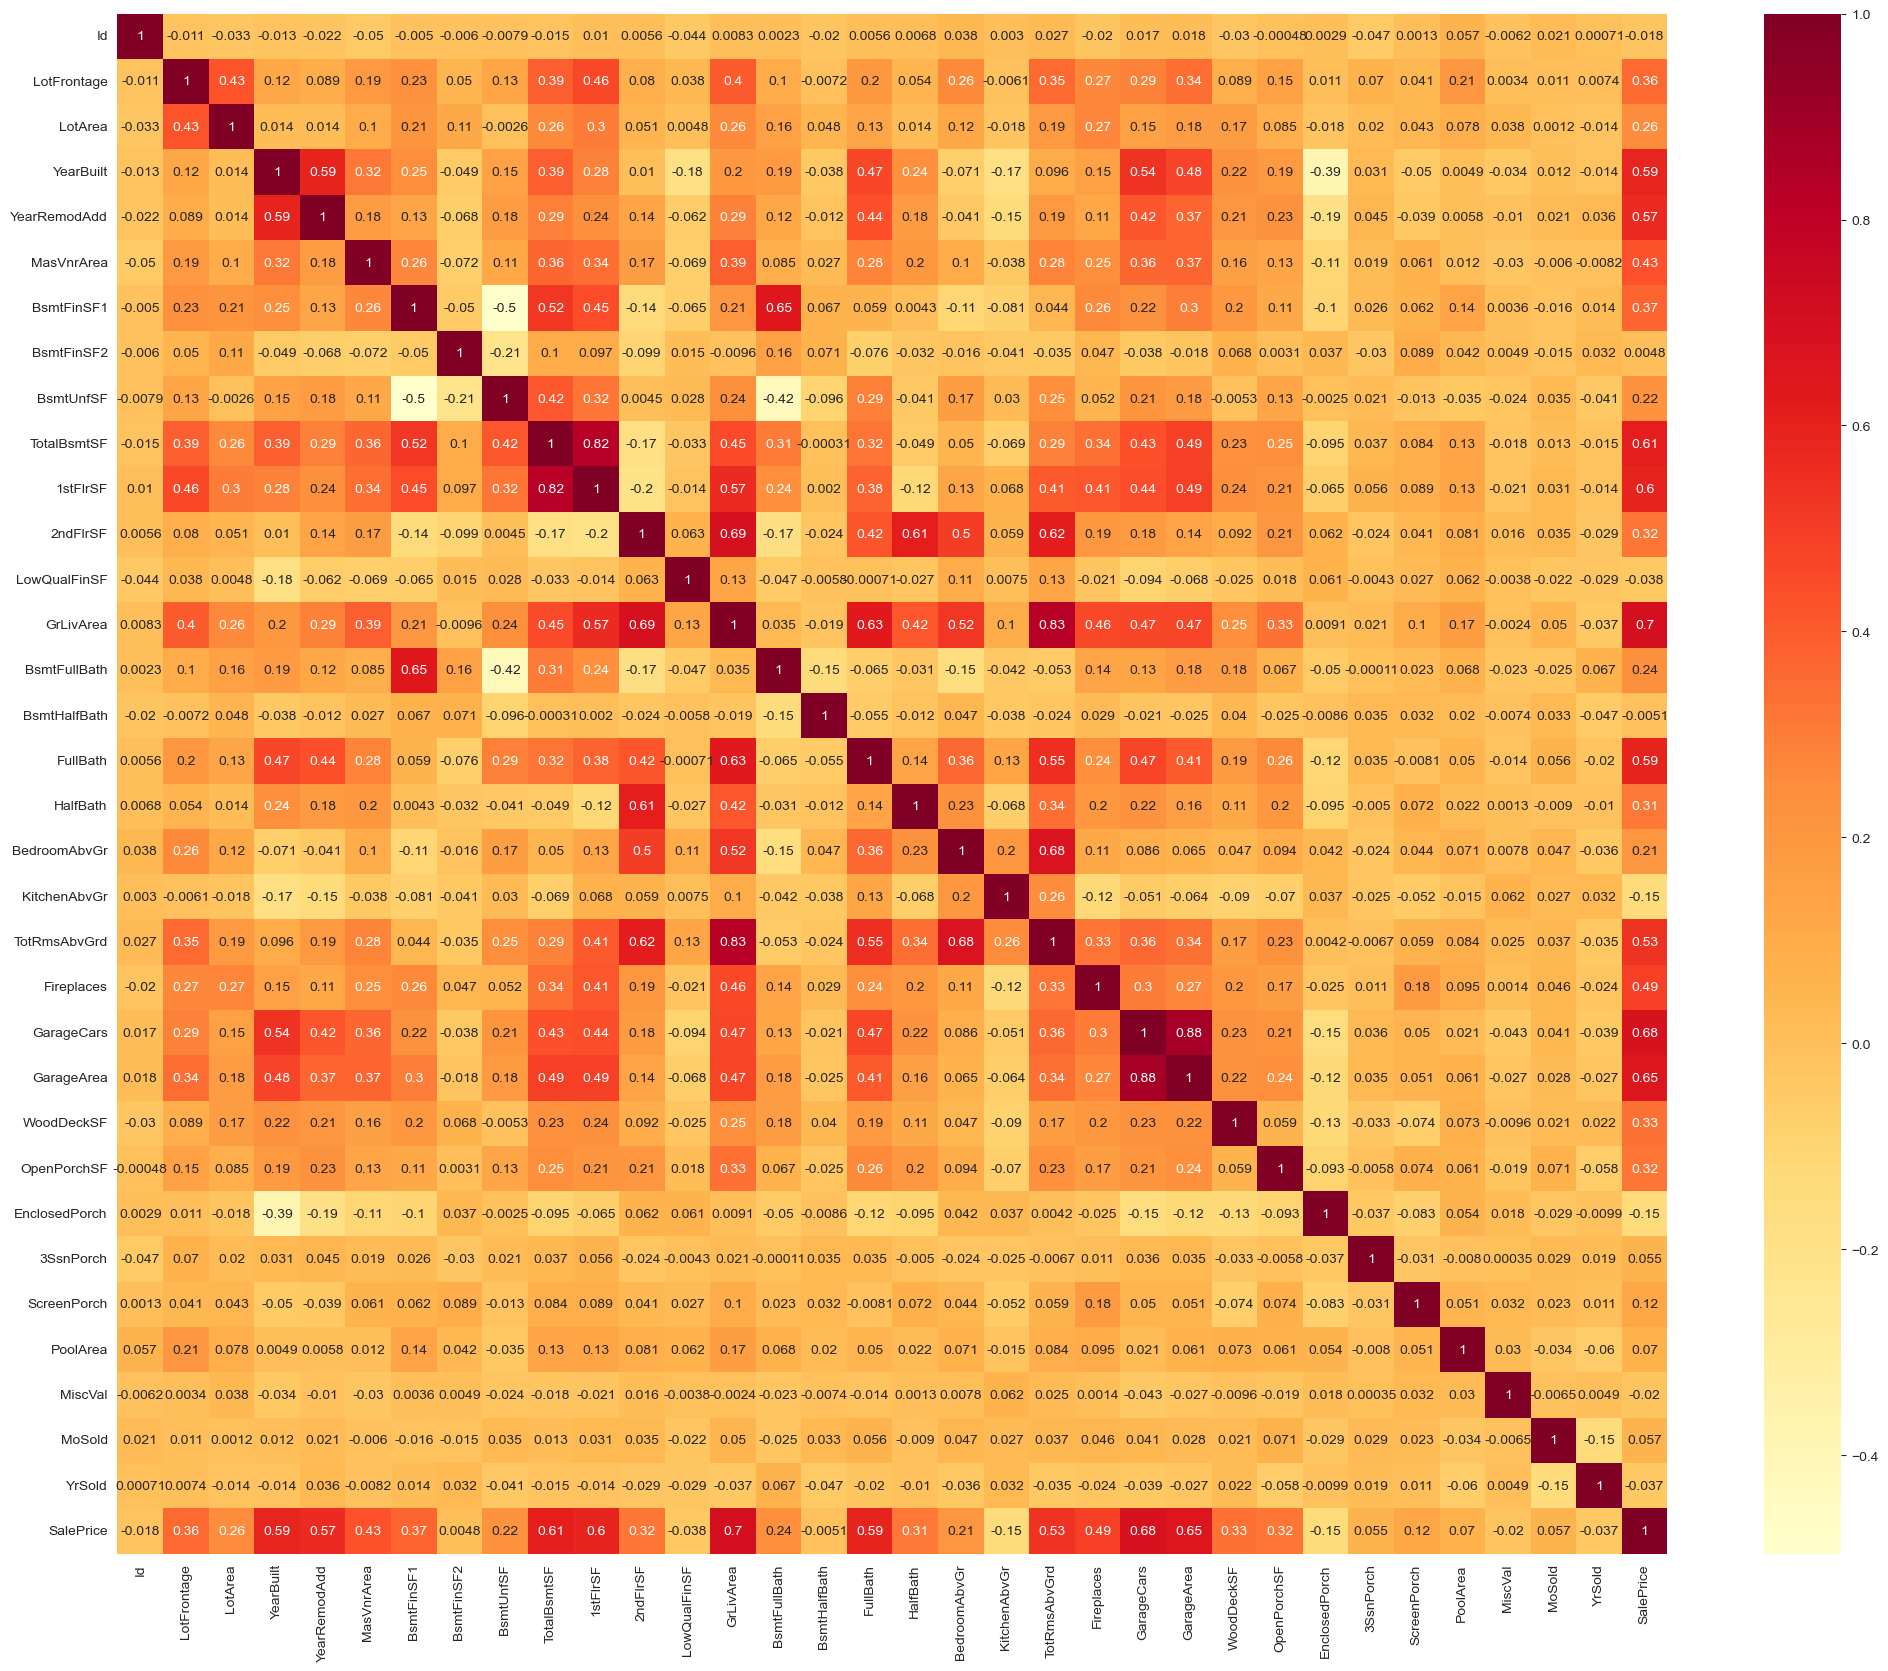

In [25]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='YlOrRd')

#### Many columns are highly correlated with each other
#### Target variable `SalesPrice` is highly correlated with `GarageArea`, `GarageCars`, `GrLiveArea`, `FullBath` and `Fireplaces`
#### Based on Multicolinearity present in features variables, Ridge Regression will be suitable here

## 3. Data Preprocessing

### Missing Value Treatment

In [26]:
# View the missing values in all features
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

LotFrontage    259
MasVnrArea       8
dtype: int64

##### Missing values are found for columns `LotFrontage` and `MasVnrArea`. As both the columns are numeric columns, we will replace the missing values by mean value of respective columns

In [27]:
# Replacing missing values in the above mentioned two columns by their means
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [28]:
# Checking missing values again
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

### One Hot Encoding

In [29]:
# Separate the categorical and numerical features again from original dataframe
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

In [30]:
# One hot encoding of the categorical columns
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1           1           0             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0   
1              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0            1           1           0             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0   
2              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1           1           0             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0   
3              0              0    

In [31]:
# Check the dimensions
df_cat_encoded.shape

(1460, 352)

### Outlier Treatment

<Axes: >

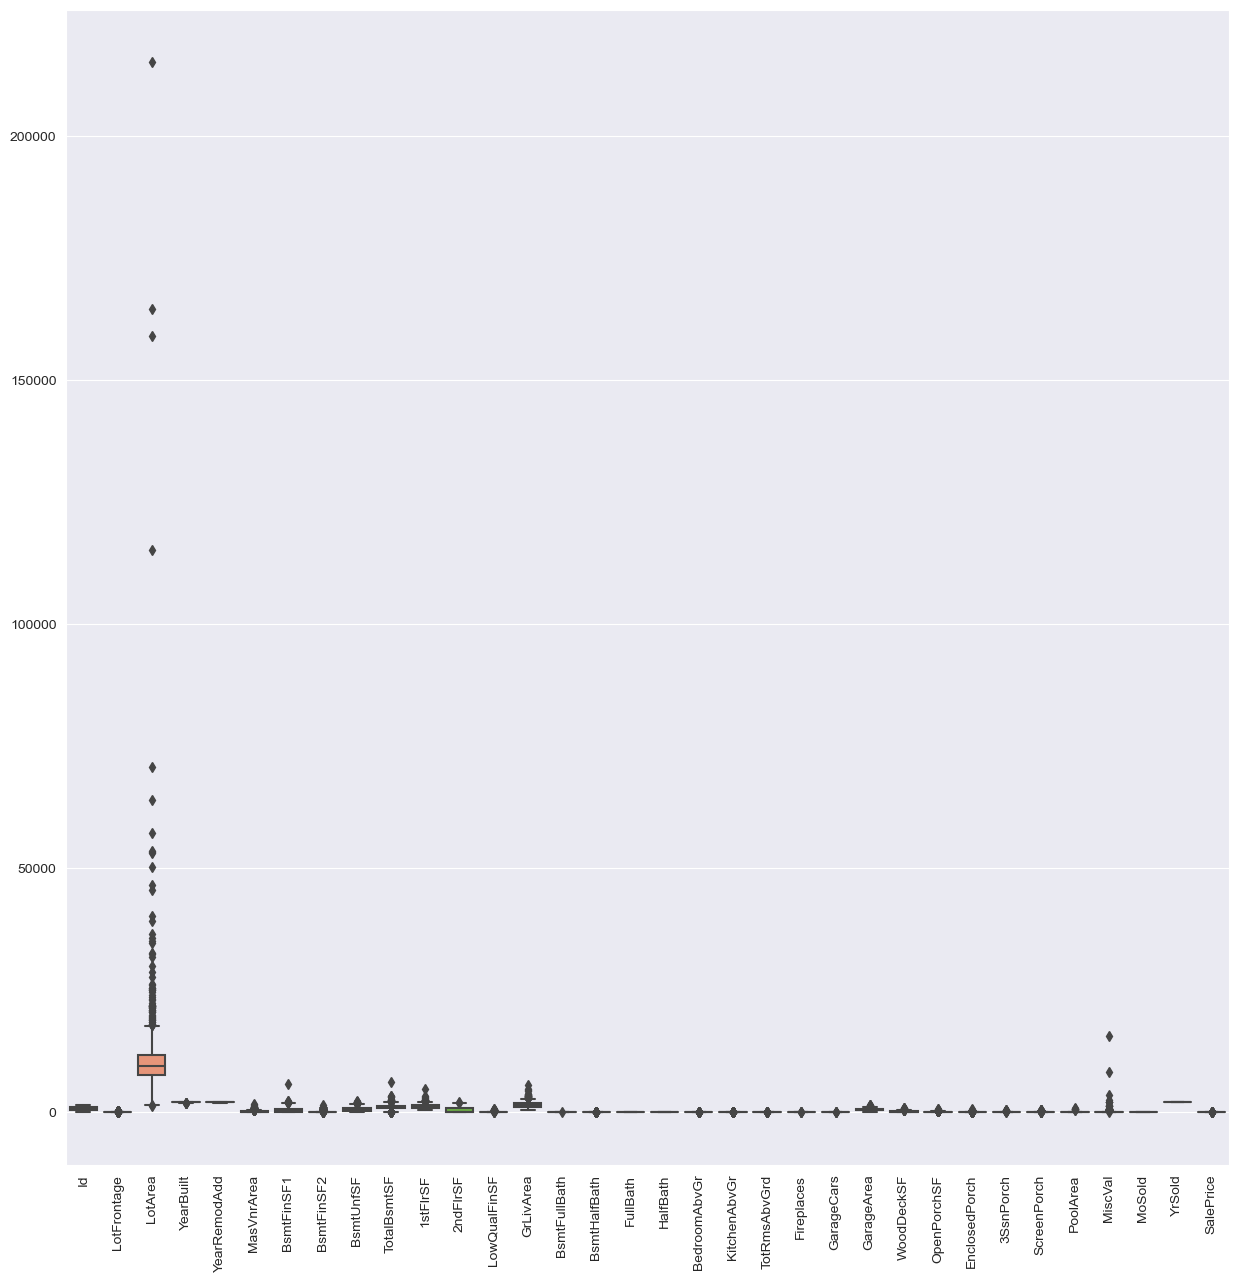

In [32]:
# Check the boxplots to view outliers in numerical columns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.boxplot(data=df_num)

In [33]:
# Outliers are capped to 5% and 95% at lower and upper band respectively
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

<Axes: >

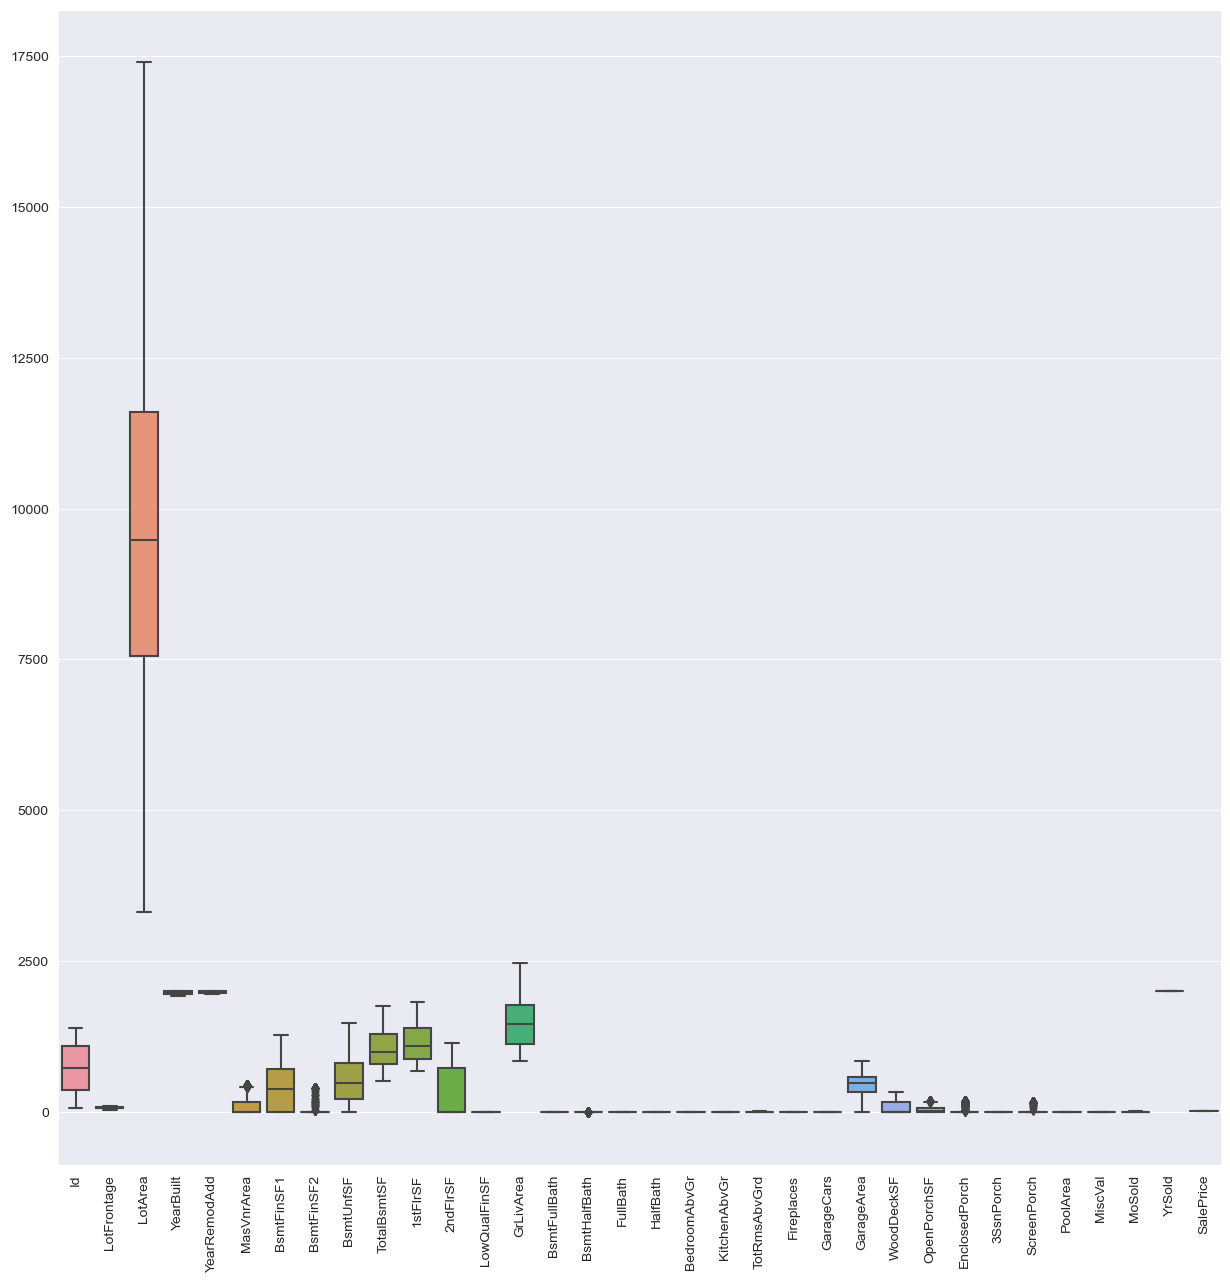

In [34]:
# Check the boxplots again to view outliers in numerical columns after treatment
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.boxplot(data=df_num)

#### After one hot encoding is done and outliers are removed we can concat this data to main dataframe

In [35]:
# Concatenate the outlier treated numerical columns and one hot encoded numerical columns to dataframe
df = pd.concat([df_num, df_cat_encoded], axis=1)

df.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0  73.95         65.0   8450.0       2003          2003       196.0         706         0.0        150        856.0     856.0     854.0             0     1710.0             1             0         2         1             3             1             8           0           2       548.0           0         61.0           0.00          0            0         0        0       2    2008  12.247694              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1           1           0             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0   
1  73.95         80.0   9600.0       1976          1976         0.0         978         0.0        284       1262.0    1262.0       0.0             0     1262.0             0             1         2         0             3             1             6           1           2       460.0         298          0.0           0.00          0            0         0        0       5    2007  12.109011              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0            1           1           0             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0   
2  73.95         68.0  11250.0       2001          2002       162.0         486         0.0        434        920.0     920.0     866.0             0     1786.0             1             0         2         1             3             1             6           1           2       608.0           0         42.0           0.00          0            0         0        0       9    2008  12.317167              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1           1           0             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0   
3  73.95      

## 4. Model Build and Evaluation

### Split the data into Predictor and Target variables

In [36]:
# Consider all variables as predictor variables except Target variable SalePrice and Id
X = df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0         65.0   8450.0       2003          2003       196.0         706         0.0        150        856.0     856.0     854.0             0     1710.0             1             0         2         1             3             1             8           0           2       548.0           0         61.0           0.00          0            0         0        0       2    2008              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1           1           0             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0   
1         80.0   9600.0       1976          1976         0.0         978         0.0        284       1262.0    1262.0       0.0             0     1262.0             0             1         2         0             3             1             6           1           2       460.0         298          0.0           0.00          0            0         0        0       5    2007              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0            1           1           0             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0   
2         68.0  11250.0       2001          2002       162.0         486         0.0        434        920.0     920.0     866.0             0     1786.0             1             0         2         1             3             1             6           1           2       608.0           0         42.0           0.00          0            0         0        0       9    2008              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1           1           0             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0   
3         60.0   9550.0       1916          1970         0.0         216         0.

In [37]:
# Take the target variable out
y = df['SalePrice'].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Train-Test Data Split 

In [38]:
# Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, shuffle=True)

In [39]:
# View Train Data
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_train:  (1168, 384)
y_train:  (1168,)


In [40]:
# View Test Data
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_test:  (292, 384)
y_test:  (292,)


### Scaling Numerical Columns

In [41]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [42]:
# Create a scaling instance
scaler = StandardScaler()

# Scale the numerical columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Model 1: Ridge Regression

In [43]:
# Function for checking and show metrices
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    # Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    # R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    # Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    # Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [44]:
# Now to create a Ridge Regression model, we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validatin
folds = 5
ridgeCV = GridSearchCV(estimator=ridge,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1,
                      n_jobs=-1)

ridgeCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
# View the Optimal value of alpha
ridgeCV.best_params_

{'alpha': 10.0}

In [46]:
# View reulsts of ridge validation of cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.13102822, 0.15926447, 0.10288754, 0.08213863, 0.0594336 ,
        0.06204972, 0.06374736, 0.06996231, 0.067133  , 0.07895217,
        0.06510339, 0.07861476, 0.0929749 , 0.08135819, 0.09655504,
        0.0649622 , 0.07200284, 0.06820707, 0.07655778, 0.06234341,
        0.07193985, 0.0628027 , 0.06974697, 0.05851793, 0.06570511,
        0.06608372, 0.07040396, 0.06288919]),
 'std_fit_time': array([0.04071261, 0.05328112, 0.01214261, 0.01834761, 0.00536461,
        0.00477482, 0.01001151, 0.02148815, 0.01565209, 0.02035245,
        0.00789369, 0.00679038, 0.02368761, 0.0328862 , 0.00887808,
        0.01543053, 0.01143542, 0.01339216, 0.02374161, 0.009277  ,
        0.01463532, 0.00610848, 0.01362817, 0.00697394, 0.01026329,
        0.00970199, 0.00522769, 0.01593419]),
 'mean_score_time': array([0.02004461, 0.02967296, 0.02715182, 0.0172318 , 0.01381927,
        0.01271267, 0.02451854, 0.01591525, 0.01470723, 0.01411033,
        0.01291056, 0.02540789, 0.025206

#### Building a Ridge regression model using alpha as 10 which is optimal value of alpha

In [47]:
# Create a ridge regression instance with optimal alpha value 10
ridge = Ridge(alpha=10)

# Fit the model on training data
ridge.fit(X_train, y_train)

# View the coefficients of lasso fitted model
print(ridge.coef_)

# Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

[ 3.90621733e-03  2.21185822e-02  4.97734713e-02  2.56727262e-02
 -3.22294702e-03  1.09462348e-02  1.60330682e-03 -1.25889370e-02
  5.55385193e-02  1.96001047e-02  3.97054925e-02  0.00000000e+00
  7.53748261e-02  1.01746137e-02 -8.83233480e-04  1.21834788e-02
  1.13823651e-02  9.62118092e-04  0.00000000e+00 -2.84595000e-03
  1.16257879e-02  9.91673879e-03  2.24698726e-02  1.22102438e-02
  7.57306368e-03  2.94541885e-03  0.00000000e+00  7.10010767e-03
  0.00000000e+00  0.00000000e+00  1.14562292e-03 -4.41118400e-03
 -3.84177636e-02 -2.70311920e-03  6.01823243e-04  2.09150645e-03
 -7.21645559e-03  3.93560587e-02  1.49846890e-02  5.91961244e-03
  1.27199102e-02 -2.61513738e-02  3.13801776e-03 -4.92067071e-02
 -2.38878611e-02 -2.01963953e-02  4.56097765e-02  2.31199132e-02
  1.71044783e-02 -2.47287704e-02 -5.88128353e-03 -4.18752355e-03
  1.40526669e-02  3.94586287e-03 -1.63828063e-02 -3.47764612e-03
  1.87904225e-02  1.68698472e-02  1.35756756e-02 -1.10013832e-02
  2.43567074e-02 -1.69449

In [48]:
# Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.91
RSS (Train) = 8.29
RSS (Test) = 3.19
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.10


#### Now we need to plot R2 score against different values of alpha for both test and train

In [49]:
# Create a dataframe of ridge cross validation results
ridgeCV_results = pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0        0.131028      0.040713         0.020045        0.004896      0.0001  {'alpha': 0.0001}          -0.111774          -0.090891          -0.103212          -0.080696          -0.088287        -0.094972        0.011094               27           -0.044839           -0.049878           -0.049536           -0.051905           -0.050128         -0.049257         0.002356
1        0.159264      0.053281         0.029673        0.007948       0.001   {'alpha': 0.001}          -0.111244          -0.089545          -0.103150          -0.080840          -0.088120        -0.094580        0.011018               26           -0.044856           -0.049915           -0.049538           -0.051931           -0.050132         -0.049274         0.002358
2        0.102888      0.012143         0.027152        0.011851        0.01    {'alpha': 0.01}          -0.110016          -0.086351          -0.102579          -0.081118          -0.086796        -0.093372        0.010995               25           -0.044916           -0.050099           -0.049562           -0.052028           -0.050197         -0.049360         0.002373
3        0.082139      0.018348         0.017232        0.002750        0.05    {'alpha': 0.05}          -0.108051          -0.084392          -0.100671          -0.080568          -0.084263        -0.091589        0.010774               23           -0.045084           -0.050534           -0.049655           -0.052202           -0.050631         -0.049621         0.002413
4        0.059434      0.005365         0.013819        0.001136         0.1     {'alpha': 0.1}          -0.106286          -0.083324          -0.098969          -0.079986          -0.082627        -0.090239        0.010436               22           -0.045302           -0.050999           -0.049741           -0.052424           -0.051100         -0.049914         0.002457
5        0.062050      0.004775         0.012713        0.001718         0.2     {'alpha': 0.2}          -0.103687          -0.081954          -0.096539          -0.078960          -0.080589        -0.088346        0.009915               21           -0.045817           -0.051708           -0.049895           -0.052867           -0.051817         -0.050421         0.002492
6        0.063747      0.010012         0.024519        0.008725         0.3     {'alpha': 0.3}          -0.101857          -0.080876          -0.094870          -0.078143          -0.079542        -0.087058        0.009531               20           -0.046280           -0.052271           -0.050060           -0.053192           -0.052351         -0.050831         0.002501
7        0.069962      0.021488         0.015915        0.008087         0.4     {'alpha': 0.4}          -0.100404          -0.080027          -0.093509          -0.077455          -0.078738        -0.086027        0.009223               19           -0.046662           -0.052724           -0.050223           -0.053480           -0.052769         -0.051172         0.002511
8        0.067133      0.015652         0.014707        0.004526         0.5     {'alpha': 0.5}          -0.099263          -0.079290          -0.092352          -0.076840          -0.078091        -0.085167        0.008992               18           -0.047030           -0.053090           -0.050382           -0.053735           -0.053104         -0.051468         0.002503
9        0.078952      0.020352         0.014110        0.002291         0.6     {'alpha': 0.6}          -0.098280          -0.078737          -0.091373          -0.076298          -0.077611        -0.084460        0.008776               17    

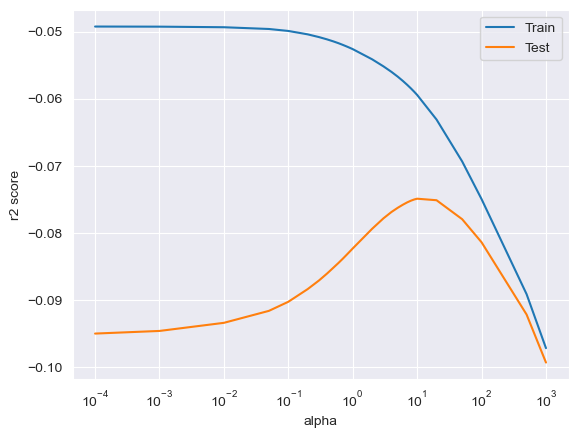

In [50]:
# Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.legend()
plt.show()

#### The Optimal Value of alpha is 10 based on the graph
#### As the value of alpha increases, there is decrease in train error and test error initially increases and test error decreases later

### Model 2: Lasso Regression

In [51]:
# Now to create a Lasso Regression model, we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
lassoCV = GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1,
                      n_jobs=-1)

lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
# View optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [53]:
# View the lasso cross validation search results
lassoCV.cv_results_

{'mean_fit_time': array([0.62675924, 0.2151669 , 0.1124558 , 0.10944805, 0.0804431 ,
        0.07804866, 0.04166007, 0.0533968 , 0.04022698, 0.0446312 ,
        0.04738617, 0.0424233 , 0.04148512, 0.04295301, 0.0396317 ,
        0.0377141 , 0.041993  , 0.0421845 , 0.03867936, 0.04214582,
        0.04526391, 0.04196472, 0.04405341, 0.04289289, 0.04071908,
        0.04420171, 0.04040465, 0.04098101]),
 'std_fit_time': array([0.14821135, 0.06586961, 0.01803015, 0.02278257, 0.0037618 ,
        0.02232389, 0.00320018, 0.00793025, 0.00490914, 0.00581329,
        0.01467028, 0.00191459, 0.00577349, 0.00429555, 0.00300875,
        0.00314255, 0.00403324, 0.00614503, 0.00352715, 0.00453867,
        0.00483369, 0.00211791, 0.0034673 , 0.00647913, 0.00170441,
        0.00371258, 0.0024985 , 0.00304414]),
 'mean_score_time': array([0.01970878, 0.01840358, 0.01911139, 0.01900215, 0.01380491,
        0.01202073, 0.01099954, 0.01332574, 0.01240916, 0.01160345,
        0.01489844, 0.01580243, 0.013235

#### Building a Lasso regression model using alpha as 0.001 which is optimal value of alpha

In [54]:
# Create a lasso regression instance with optimal alpha value 0.001
lasso = Lasso(alpha=0.001)

# Fit the model on training data
lasso.fit(X_train, y_train)

# View the coefficients of lasso fitted model
print(lasso.coef_)

# Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

[ 1.78615403e-03  2.12652688e-02  5.66973625e-02  2.92064957e-02
  0.00000000e+00  2.35151144e-02  2.77291875e-03 -5.63867176e-04
  5.45676005e-02  0.00000000e+00  1.32537440e-02  0.00000000e+00
  1.01378280e-01  1.07825262e-02  0.00000000e+00  4.03071938e-03
  9.54477979e-03 -0.00000000e+00  0.00000000e+00 -8.18644781e-04
  1.82425939e-02  1.18346953e-02  2.34503948e-02  1.29794628e-02
  7.07663963e-03  3.15396573e-03  0.00000000e+00  6.61544106e-03
  0.00000000e+00  0.00000000e+00  8.03990555e-05 -2.45445812e-03
 -1.33168069e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.00802241e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11321991e-02  0.00000000e+00 -3.44559108e-02
 -0.00000000e+00 -0.00000000e+00  2.09978441e-02  0.00000000e+00
  0.00000000e+00 -4.46459881e-02 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -6.14263390e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  1.25107338e-02 -0.00000

In [55]:
# Check metrics for lasso regression
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.91
RSS (Train) = 10.94
RSS (Test) = 3.31
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.11


#### Now we need to plot R2 score against different values of alpha for both test and train

In [56]:
# Create a dataframe of ridge cross validation results
lassoCV_results = pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0        0.626759      0.148211         0.019709        0.010091      0.0001  {'alpha': 0.0001}          -0.087616          -0.073335          -0.080363          -0.068316          -0.071156        -0.076157        0.006978                2           -0.050147           -0.054818           -0.053345           -0.056248           -0.055250         -0.053961         0.002124
1        0.215167      0.065870         0.018404        0.011418       0.001   {'alpha': 0.001}          -0.082650          -0.071355          -0.076475          -0.068752          -0.075645        -0.074975        0.004763                1           -0.066239           -0.070231           -0.067410           -0.069592           -0.069241         -0.068543         0.001485
2        0.112456      0.018030         0.019111        0.010565        0.01    {'alpha': 0.01}          -0.102258          -0.092843          -0.098628          -0.096415          -0.102234        -0.098476        0.003590                3           -0.095768           -0.098102           -0.096491           -0.096944           -0.096738         -0.096808         0.000759
3        0.109448      0.022783         0.019002        0.008901        0.05    {'alpha': 0.05}          -0.128286          -0.118036          -0.118009          -0.124253          -0.121235        -0.121964        0.003919                4           -0.118579           -0.122958           -0.119773           -0.121090           -0.120984         -0.120677         0.001462
4        0.080443      0.003762         0.013805        0.001944         0.1     {'alpha': 0.1}          -0.169706          -0.163380          -0.155211          -0.164117          -0.158066        -0.162096        0.005046                5           -0.158687           -0.161966           -0.159657           -0.160359           -0.161470         -0.160428         0.001190
5        0.078049      0.022324         0.012021        0.001433         0.2     {'alpha': 0.2}          -0.259480          -0.263850          -0.242288          -0.256291          -0.250150        -0.254412        0.007529                6           -0.253174           -0.253356           -0.252695           -0.252332           -0.253738         -0.253059         0.000495
6        0.041660      0.003200         0.011000        0.001263         0.3     {'alpha': 0.3}          -0.296031          -0.300690          -0.279976          -0.293363          -0.287688        -0.291549        0.007152                7           -0.290076           -0.288160           -0.293778           -0.289557           -0.292109         -0.290736         0.001980
7        0.053397      0.007930         0.013326        0.005275         0.4     {'alpha': 0.4}          -0.296031          -0.300690          -0.279976          -0.293363          -0.287688        -0.291549        0.007152                7           -0.290076           -0.288160           -0.293778           -0.289557           -0.292109         -0.290736         0.001980
8        0.040227      0.004909         0.012409        0.001362         0.5     {'alpha': 0.5}          -0.296031          -0.300690          -0.279976          -0.293363          -0.287688        -0.291549        0.007152                7           -0.290076           -0.288160           -0.293778           -0.289557           -0.292109         -0.290736         0.001980
9        0.044631      0.005813         0.011603        0.001857         0.6     {'alpha': 0.6}          -0.296031          -0.300690          -0.279976          -0.293363          -0.287688        -0.291549        0.007152                7    

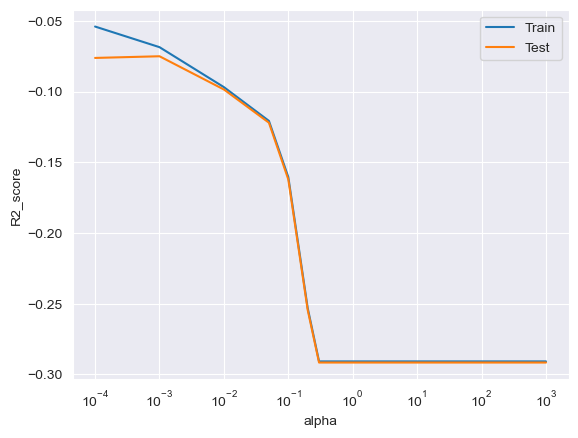

In [57]:
# Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

#### There is decrease in Train and Test error as alpha value increases.
#### Optimal alpha value is 0.001

## 6. Comparing the Ridge and Lasso models

In [58]:
# Setting float display options
pd.options.display.float_format = "{:,.2f}".format

In [59]:
# Creating a table which contain all the metrics

lr_table = {'Evaluation Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression': ridge_metrics,
            'Lasso Regression': lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns=['Evaluation Metric', 'Ridge Regression', 'Lasso Regression'])
final_metric.set_index('Evaluation Metric')

Ridge Regression  Lasso Regression
Evaluation Metric                                    
R2 Score (Train)               0.94              0.92
R2 Score (Test)                0.91              0.91
RSS (Train)                    8.29             10.94
RSS (Test)                     3.19              3.31
MSE (Train)                    0.01              0.01
MSE (Test)                     0.01              0.01
RMSE (Train)                   0.08              0.10
RMSE (Test)                    0.10              0.11

#### R2 Score on test data is 0.91 for both Ridge and Lasso Regression

#### Lets observe the changes in the coefficients after regularization

In [60]:
# First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

# Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

# View betas/coefficients
betas

Ridge  Lasso
LotFrontage             0.00   0.00
LotArea                 0.02   0.02
YearBuilt               0.05   0.06
YearRemodAdd            0.03   0.03
MasVnrArea             -0.00   0.00
...                      ...    ...
SaleCondition_AdjLand   0.02   0.00
SaleCondition_Alloca    0.02   0.00
SaleCondition_Family   -0.02  -0.00
SaleCondition_Normal    0.04   0.04
SaleCondition_Partial   0.02   0.00

[384 rows x 2 columns]

In [61]:
# View the features removed by lasso
betas[betas['Lasso'] == 0]

Ridge  Lasso
MasVnrArea             -0.00   0.00
1stFlrSF                0.02   0.00
LowQualFinSF            0.00   0.00
BsmtHalfBath           -0.00   0.00
BedroomAbvGr            0.00  -0.00
...                      ...    ...
SaleType_Oth           -0.00  -0.00
SaleType_WD            -0.00  -0.00
SaleCondition_AdjLand   0.02   0.00
SaleCondition_Alloca    0.02   0.00
SaleCondition_Family   -0.02  -0.00

[305 rows x 2 columns]

#### Above 305 features out of 384 from X_train have been removed by Lasso. Here Lasso regression performs feature selection

#### Features selected by Lasso Regression

In [62]:
# View the number of features removed by lasso
betas.loc[betas['Lasso'] != 0, 'Lasso']

LotFrontage              0.00
LotArea                  0.02
YearBuilt                0.06
YearRemodAdd             0.03
BsmtFinSF1               0.02
                         ... 
GarageQual_Fa           -0.00
GarageCond_TA            0.00
SaleType_New             0.02
SaleCondition_Normal     0.04
SaleCondition_Partial    0.00
Name: Lasso, Length: 79, dtype: float64

## 6. Inferences for Surprise Housing Company

#### Check top 10 features significant for predicting value of house using Ridge and Lasso Regression Models

In [63]:
# See top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

Neighborhood_Crawfor   0.09
OverallCond_9          0.08
OverallQual_9          0.08
GrLivArea              0.08
OverallQual_8          0.07
Functional_Typ         0.06
TotalBsmtSF            0.06
Exterior1st_BrkFace    0.05
YearBuilt              0.05
MSZoning_FV            0.05
Name: Ridge, dtype: float64

In [64]:
# We have to take inverse log (e to power) of betas to interpret ridge coefficients
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

Neighborhood_Crawfor   1.09
OverallCond_9          1.08
OverallQual_9          1.08
GrLivArea              1.08
OverallQual_8          1.08
Functional_Typ         1.06
TotalBsmtSF            1.06
Exterior1st_BrkFace    1.06
YearBuilt              1.05
MSZoning_FV            1.05
Name: Ridge, dtype: float64

In [65]:
# See top 10 coefficients of Lasso regression in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9          0.13
OverallQual_8          0.11
Neighborhood_Crawfor   0.10
GrLivArea              0.10
Functional_Typ         0.06
YearBuilt              0.06
TotalBsmtSF            0.05
OverallQual_7          0.05
Exterior1st_BrkFace    0.04
Condition1_Norm        0.04
Name: Lasso, dtype: float64

In [66]:
# We have to take inverse log (e to power) of betas to interpret ridge coefficients
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.14
OverallQual_8          1.12
Neighborhood_Crawfor   1.11
GrLivArea              1.11
Functional_Typ         1.06
YearBuilt              1.06
TotalBsmtSF            1.06
OverallQual_7          1.05
Exterior1st_BrkFace    1.05
Condition1_Norm        1.04
Name: Lasso, dtype: float64

### Inference:

#### The below vairables are significant in predicting the price of a house:
`Neighborhood_Crawfor`, `GrLivArea`, `OverallQual_9`, `OverallQual_8`, `Functional_Typ`, `YearBuilt`, `TotalBsmtSF`
`Exterior1st_BrkFace`, `OverallCond_9`, `OverallQual_7`, `MSZoning_FV`, `Condition1_Norm`

#### The variables affect the House prices in below manner:
- Increase of 1 square foot in `GrLivArea` will increase the price of house by `1.08 to 1.11` times
- Based on `OverallQual_9` and `OverallQual_8` the house price will increase by `1.08 to 1.14`
- `Neighborhood_Crawfor` in nearby location will increase the price by `1.09 to 1.11`
- The house price will increase by `1.06` times based on `Functional_Typ`
- Because of variable `Exterior1st_BrkFace` saying exterior brick facing will increase price by `1.05 to 1.06`

#### Optimal Value of alpha for Ridge Regression is 10
#### Optimal Value of alpha for Lasso Regression is 0.001

## 7. Coding for answering the subjective questions

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

## Answer:

- Optimal value of alpha for Ridge Regression = **10**


- Optimal value of alpha for Lasso = **0.001**

In [67]:
# Building Ridge regression model with double value of alpha i.e. 20
double_ridge = Ridge(alpha=20)

# Fit the model on training data
double_ridge.fit(X_train, y_train)

# Make predictions
y_train_pred = double_ridge.predict(X_train)
y_pred = double_ridge.predict(X_test)

# Check metrics
double_ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.91
RSS (Train) = 9.12
RSS (Test) = 3.19
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [68]:
# Building Lasso regression model with double value of alpha i.e. 0.002
double_lasso = Lasso(alpha=0.002)

# Fit the model on training data
double_lasso.fit(X_train, y_train)

# Make predictions
y_train_pred = double_lasso.predict(X_train)
y_pred = double_lasso.predict(X_test)

# Check metrics
double_lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.89
RSS (Train) = 13.18
RSS (Test) = 3.91
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.12


In [69]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : double_ridge_metrics,
            'Lasso Regression' : double_lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.94              0.91
R2 Score (Test)               0.91              0.89
RSS (Train)                   9.12             13.18
RSS (Test)                    3.19              3.91
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.09              0.11
RMSE (Test)                   0.10              0.12

#### Changes in Ridge Regression metrics:
- R2 score of train set remained same at 0.94
- R2 score of test set remained same at 0.94

#### Changes in Lasso Regression metrics:
- R2 score of train set decreased from 0.92 to 0.91
- R2 score of test set decreased from 0.91 to 0.89

#### Lets observe the changes in the coefficients after regularization

In [70]:
# First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

# Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = double_ridge.coef_
betas['Lasso'] = double_lasso.coef_

# View betas/coefficients
betas

Ridge  Lasso
LotFrontage             0.00   0.00
LotArea                 0.02   0.02
YearBuilt               0.04   0.05
YearRemodAdd            0.03   0.04
MasVnrArea             -0.00   0.00
...                      ...    ...
SaleCondition_AdjLand   0.01   0.00
SaleCondition_Alloca    0.01  -0.00
SaleCondition_Family   -0.02  -0.00
SaleCondition_Normal    0.04   0.02
SaleCondition_Partial   0.02   0.00

[384 rows x 2 columns]

#### Check top 10 features significant for predicting value of house using Ridge and Lasso Regression Models

In [71]:
# See top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

Neighborhood_Crawfor   0.07
GrLivArea              0.07
OverallQual_8          0.07
OverallQual_9          0.06
Functional_Typ         0.05
TotalBsmtSF            0.05
OverallCond_9          0.05
YearBuilt              0.04
Exterior1st_BrkFace    0.04
OverallCond_7          0.04
Name: Ridge, dtype: float64

In [72]:
# We have to take inverse log (e to power) of betas to interpret ridge coefficients
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

Neighborhood_Crawfor   1.07
GrLivArea              1.07
OverallQual_8          1.07
OverallQual_9          1.06
Functional_Typ         1.06
TotalBsmtSF            1.05
OverallCond_9          1.05
YearBuilt              1.05
Exterior1st_BrkFace    1.05
OverallCond_7          1.04
Name: Ridge, dtype: float64

In [73]:
# See top 10 coefficients of Lasso regression in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.10
OverallQual_8          0.09
OverallQual_9          0.08
Neighborhood_Crawfor   0.08
Functional_Typ         0.06
TotalBsmtSF            0.06
YearBuilt              0.05
OverallQual_7          0.04
YearRemodAdd           0.04
Condition1_Norm        0.03
Name: Lasso, dtype: float64

In [74]:
# We have to take inverse log (e to power) of betas to interpret ridge coefficients
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.11
OverallQual_8          1.09
OverallQual_9          1.09
Neighborhood_Crawfor   1.08
Functional_Typ         1.06
TotalBsmtSF            1.06
YearBuilt              1.05
OverallQual_7          1.04
YearRemodAdd           1.04
Condition1_Norm        1.04
Name: Lasso, dtype: float64

#### So, the most important predictor variables after alpha values are doubles:
- GrLivArea
- OverallQual_8
- OverallQual_9
- Neighborhood_Crawfor
- Functional_Typ
- TotalBsmtSF
- Exterior1st_BrkFace
- YearBuilt

### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

## Answer:

- I will choose **Lasso Regression**. Lasso regression has feature section which has removed unwanted columns without affecting model accuracy.

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

## Answer:

- Drop top 5 features in Lasso model and build model again
- Top 5 Lasso predictors were `Neighborhood_Crawfor`, `GrLivArea`, `OverallQual_9`, `OverallQual_8`, `Functional_Typ`

In [75]:
# Creating list of top 5 predictors to be removed
top5_predictors = ['Neighborhood_Crawfor', 'GrLivArea', 'OverallQual_9', 'OverallQual_8', 'Functional_Typ']

In [76]:
# drop these from train and test data
X_train_dropped = X_train.drop(top5_predictors, axis=1)
X_test_dropped = X_test.drop(top5_predictors, axis=1)

In [77]:
# Now to create a Lasso Regression model, we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
lassoCV = GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1,
                      n_jobs=-1)

lassoCV.fit(X_train_dropped, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
# View optimal value of alpha
lassoCV.best_params_

{'alpha': 0.0001}

In [79]:
# View the lasso cross validation search results
lassoCV.cv_results_

{'mean_fit_time': array([0.46581759, 0.16311483, 0.09395342, 0.11818061, 0.12175517,
        0.09085798, 0.04497147, 0.04248543, 0.04572415, 0.05312514,
        0.05188956, 0.04893227, 0.04269643, 0.03803768, 0.03725457,
        0.04526534, 0.05326061, 0.05455923, 0.05313954, 0.05034409,
        0.0477119 , 0.05239706, 0.048944  , 0.06963792, 0.06092682,
        0.05773039, 0.06583872, 0.03755932]),
 'std_fit_time': array([0.20738348, 0.01367779, 0.01125463, 0.01306831, 0.00796255,
        0.02762796, 0.00920469, 0.00523998, 0.00580484, 0.01059392,
        0.02168201, 0.00756424, 0.00552253, 0.00166891, 0.00259463,
        0.00565297, 0.00520378, 0.00994231, 0.00350493, 0.00611428,
        0.01025734, 0.00817508, 0.00935438, 0.02131308, 0.01992227,
        0.01140919, 0.02887258, 0.00166853]),
 'mean_score_time': array([0.01315145, 0.01630878, 0.01260328, 0.01843133, 0.02053776,
        0.0141326 , 0.01127095, 0.01110659, 0.01452155, 0.01461949,
        0.01106415, 0.01581316, 0.011555

#### Building a Lasso regression model using alpha as 0.001 which is optimal value of alpha

In [80]:
# Create a lasso regression instance with optimal alpha value 0.001
lasso = Lasso(alpha=0.001)

# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

# View the coefficients of lasso fitted model
print(lasso.coef_)

# Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

[ 0.0023138   0.02173452  0.04881585  0.02785809  0.00486305  0.02611789
  0.00245256 -0.00027488  0.06168269  0.06574516  0.09799893  0.
  0.01023731  0.          0.0045691   0.01148096 -0.          0.
  0.00021393  0.02217744  0.01428785  0.0231839   0.01094564  0.00845076
  0.0050625   0.          0.00639511  0.          0.          0.00195555
 -0.00366303 -0.01705966  0.          0.          0.         -0.
  0.05219512  0.          0.          0.         -0.00489133  0.
 -0.05144988 -0.         -0.          0.00798414  0.          0.
 -0.05776016  0.          0.          0.          0.         -0.
 -0.00648947  0.01361058  0.         -0.         -0.          0.01038353
 -0.          0.         -0.          0.00118711  0.          0.
 -0.          0.0063235   0.         -0.         -0.06622134 -0.
 -0.         -0.01444289 -0.01192496 -0.02467095  0.         -0.
  0.          0.04718297 -0.02413847  0.         -0.01439678 -0.
  0.05375935  0.03077853  0.          0.         -0.      

In [81]:
# Check metrics for lasso regression
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.90
RSS (Train) = 12.19
RSS (Test) = 3.64
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.11


In [82]:
# Creating a table which contain all the metrics

lr_table = {'Evaluation Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression': lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns=['Evaluation Metric', 'Lasso Regression'])
final_metric.set_index('Evaluation Metric')

Lasso Regression
Evaluation Metric                  
R2 Score (Train)               0.92
R2 Score (Test)                0.90
RSS (Train)                   12.19
RSS (Test)                     3.64
MSE (Train)                    0.01
MSE (Test)                     0.01
RMSE (Train)                   0.10
RMSE (Test)                    0.11

#### Lets observe the changes in the coefficients after regularization

In [83]:
# First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns

# Now fill in the values of betas for lasso coefficients
betas['Lasso'] = lasso.coef_

# View betas/coefficients
betas

Lasso
LotFrontage             0.00
LotArea                 0.02
YearBuilt               0.05
YearRemodAdd            0.03
MasVnrArea              0.00
...                      ...
SaleCondition_AdjLand   0.00
SaleCondition_Alloca    0.00
SaleCondition_Family   -0.00
SaleCondition_Normal    0.03
SaleCondition_Partial   0.00

[379 rows x 1 columns]

In [84]:
# Now fill in the values of betas for lasso coefficients
betas['Lasso'] = lasso.coef_

In [85]:
# View the top 5 features in lasso
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF               0.10
1stFlrSF               0.07
TotalBsmtSF            0.06
Exterior1st_BrkFace    0.06
Neighborhood_Somerst   0.05
Name: Lasso, dtype: float64

#### After dropping our top 5 lasso predictors, we get new top 5 predictors:
- 2ndFlrSF
- 1stFlrSF
- TotalBsmtSF
- Exterior1st_BrkFace
- Neighborhood_Somerst

### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

## Answer
- A model is **robust** when any variation in the data does not affect its performance much. 
- A **generalizable** model is able to adapt properly to new, previously unseen data, drawn from the same distribution as the one used to create the model.

- To make sure a model is robust and generalizable, we have to take care that the model does not **overfit**. 
- This is because an overfitting model has very high variance and a smallest change in data affects the model prediction heavily. Such a model will identify all the patterns of a training data, but fail to pick up the patterns in unseen test data.
- In other words, the model should not be too complex in order to be robust and generalizable.

- If we look at it from the prespective of **Accuracy**, a too complex model will have a very high accuracy. So, to make our model more robust and generalizable, we will have to decrease variance which will lead to some bias. Addition of bias means that accuracy will decrease.
- In general, we have to find strike some balance between model accuracy and complexity. This can be achieved by Regularization techniques like Ridge Regression and Lasso.